# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

Цель исследования —  выполнить предобработку данных и изучить их, чтобы найти  особенности и зависимости, которые существуют на рынке недвижимости, проанализировать показатели продаж и цены. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

План исследования:  


### Изучим общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10249,10,4900000.0,56.5,2016-06-08T00:00:00,2,2.75,16.0,33.6,13,NaN,...,9.4,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,19.0
13286,12,4200000.0,41.8,2018-06-29T00:00:00,1,NaN,17.0,16.5,15,False,...,11.8,NaN,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,307.0
2135,16,5050000.0,62.3,2017-10-29T00:00:00,3,2.55,9.0,39.4,8,NaN,...,9.6,NaN,Санкт-Петербург,27644.0,11928.0,2.0,256.0,0.0,NaN,189.0
17922,8,12500000.0,82.8,2018-09-12T00:00:00,3,2.75,25.0,45.5,4,NaN,...,15.0,2.0,Санкт-Петербург,36982.0,10446.0,1.0,779.0,0.0,NaN,180.0
13500,8,5250000.0,43.2,2017-01-25T00:00:00,2,NaN,21.0,18.0,1,NaN,...,10.0,0.0,Санкт-Петербург,10663.0,12738.0,0.0,NaN,0.0,NaN,256.0
16060,10,4100000.0,45.6,2017-11-29T00:00:00,2,NaN,9.0,28.4,8,NaN,...,7.2,NaN,Санкт-Петербург,48815.0,14641.0,1.0,440.0,1.0,847.0,185.0
770,2,2350000.0,60.4,2018-03-26T00:00:00,3,2.50,9.0,43.2,4,NaN,...,6.5,NaN,Кингисепп,NaN,NaN,NaN,NaN,NaN,NaN,13.0
17212,12,6499000.0,70.0,2017-09-08T00:00:00,3,2.51,5.0,47.0,3,NaN,...,7.0,NaN,Санкт-Петербург,31738.0,5208.0,2.0,163.0,3.0,732.0,200.0
10394,9,4090000.0,42.0,2017-04-28T00:00:00,1,2.70,12.0,20.0,5,NaN,...,10.0,2.0,Санкт-Петербург,32263.0,12010.0,0.0,NaN,0.0,NaN,188.0
18259,13,6800000.0,54.2,2019-04-01T00:00:00,1,2.80,23.0,21.0,4,NaN,...,14.2,NaN,Санкт-Петербург,12747.0,12998.0,1.0,152.0,1.0,791.0,NaN


In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

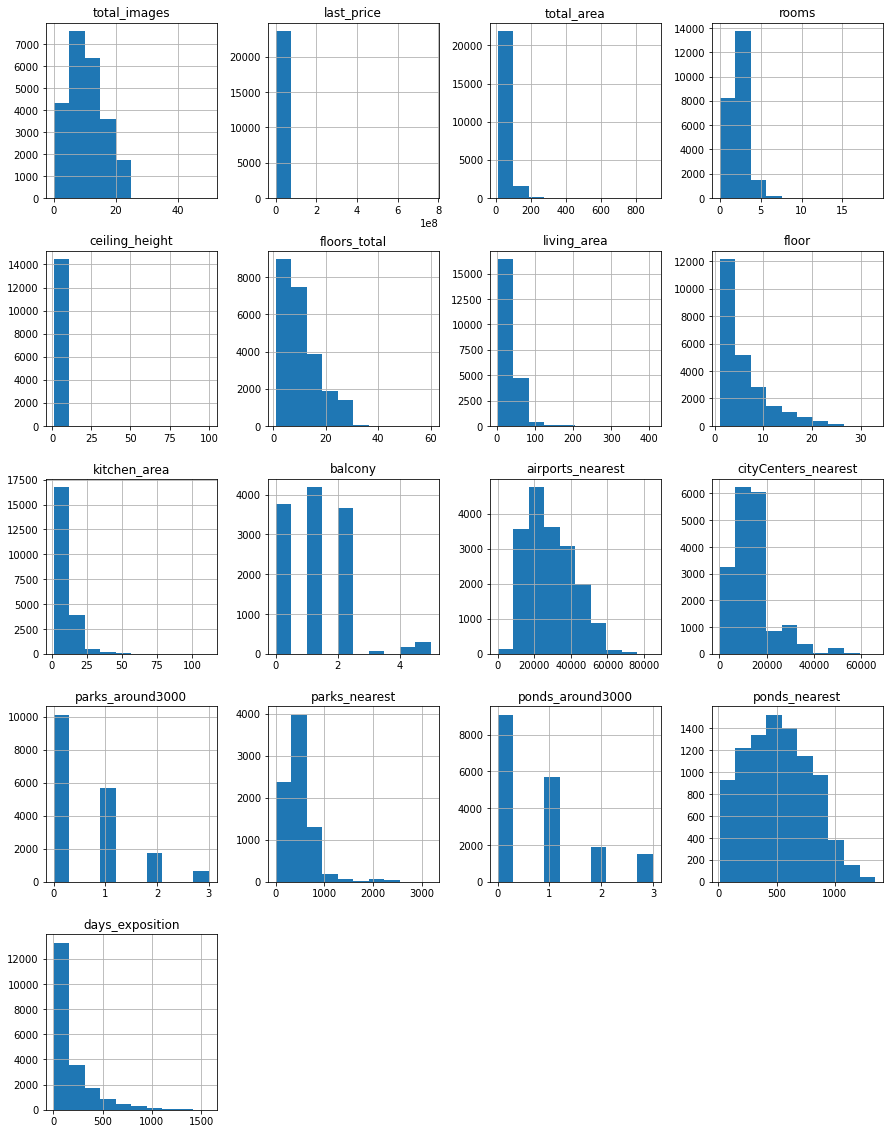

In [6]:
data.hist(figsize=(15, 20));

In [7]:
print('Количество строк:', data.shape[0])
print('Количество стобцов:',data.shape[1])

Количество строк: 23699
Количество стобцов: 22


# Описание представленных данных:
В представленном дата фрейме 22 стобца с данными, ниже представлено описание данных:<br> 
 `0   total_images`          количество представленных фотографий, формат: числовой <br>
 `1   last_price`            цена, формат: числовой <br>
 `2   total_area`            общая площадь, формат: числовой<br>
 `3   first_day_exposition`  дата публикации объявления, формат: числовой<br>
 `4   rooms`                 количество комнат, формат: числовой<br>
 `5   ceiling_height`        высота потолков, формат: числовой<br>
 `6   floors_total`          этажей в доме, формат: числовой<br>
 `7   living_area`           жилая площадь, формат: числовой<br>
 `8   floor`                 этаж квартиры, формат: числовой<br>
 `9   is_apartment`          тип квартиры апартаменты или нет, формат: текстовый<br>
 `10  studio`                тип квартиры студия или нет, формат: булевой <br>
 `11  open_plan`             открытая планировка квартиры или плановая, формат: булевой<br>
 `12  kitchen_area`          площадь кухни, формат: числовой<br>
 `13  balcony`               количество балконов, формат: числовой<br>
 `14  locality_name`         населенный пункт, формат: числовой <br>
 `15  airports_nearest`      удаленность от аэропорта, формат: числовой<br>
 `16  cityCenters_nearest`   удаленность от центра города, формат: числовой <br>
 `17  parks_around3000`      количество парков в радиусе 3км, формат: числовой<br>
 `18  parks_nearest`         удаленность от парка, формат: числовой<br>
 `19  ponds_around3000`      количество водоемов в радиусе 3км, формат: числовой<br>
 `20  ponds_nearest`         расстояние до ближайшего пруда, формат: числовой<br>
 `21  days_exposition`       количество дней размещения объявления о продаже, формат: числовой<br>
 
 При первичном осмотре данных уже заметны пропуски и некорректные типы данных.

### Предобработка данных

#### Проверим имеющиеся данные и приведем их к названию

In [8]:
list(data)

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

Приведем название столбца "cityCenters_nearest" к корректному змеиному регистру и изменим столбцы с расстоянием для удобства в отдаленности в километрах кроме расстояния до центра города. Для начала изменим названия, далее значения столбцов с метров на километры.

In [9]:
data = data.rename(columns={
    'cityCenters_nearest':'city_center',
    'airports_nearest':'nearest_airport_km',
    'parks_nearest':'nearest_park_km',
    'ponds_nearest':'nearest_ponds_km'})

In [10]:
data['nearest_airport_km'] = data['nearest_airport_km'] / 1000
display(data['nearest_airport_km'].head(5))

0    18.863
1    12.817
2    21.741
3    28.098
4    31.856
Name: nearest_airport_km, dtype: float64

In [11]:
data['nearest_ponds_km'] = data['nearest_ponds_km'] / 1000
display(data['nearest_ponds_km'].head(5))

0    0.755
1      NaN
2    0.574
3    0.234
4    0.048
Name: nearest_ponds_km, dtype: float64

In [12]:
data['nearest_park_km'] = data['nearest_park_km'] / 1000
display(data['nearest_park_km'].head(5))

0    0.482
1      NaN
2    0.090
3    0.084
4    0.112
Name: nearest_park_km, dtype: float64

#### Поиск явных и исправление дубликатов

In [13]:
data.duplicated().sum()

0

In [14]:
display(data['locality_name'].unique())
print('Итого унникальных значений:', len(data['locality_name'].unique()))

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Итого унникальных значений: 365


In [15]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [16]:
def names(name):
    name = name.str.replace('городского типа', '')
    name = name.str.replace('городской', '')
    name = name.str.replace('коттеджный', '')
    return name.str.strip()
data['locality_name'] = names(data['locality_name'])

Проверим что получилось

In [17]:
display(data['locality_name'].unique())
print('Итого унникальных значений:', len(data['locality_name'].unique()))

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок  Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок  Лебяжье', 'поселок  Сиверский',
       'поселок Молодцово', 'поселок  Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок  Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'З

Итого унникальных значений: 330


Мы убрали 35 повторяющихся населенных пункта. Заметив дубли "деревня Кудрово" и "Кудрово", также поселки при ЖД станциях. Кудрово - город, который ранее до 2018г. был деревней, так как у нас данные с 2014 по 2019,то тип "деревня" считается правильным, но это один и тот же населенный пункт. Значит будем полностью убирать статус населенного пункта и оставим только названия для более точной проработки и недопущения дублей.

In [18]:
data['locality_name'] = data['locality_name'].str.replace('деревня', '')
data['locality_name'] = data['locality_name'].str.replace('поселок', '')
data['locality_name'] = data['locality_name'].str.replace('село', '')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной станции', '')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', '')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', '')
data['locality_name'] = data['locality_name'].str.strip()

In [19]:
display(data['locality_name'].unique())
print('Итого уникальных значений:', len(data['locality_name'].unique()))

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Итого уникальных значений: 309


Осталось 309 значений, мы полностью исключили тип населенного пункта.

In [20]:
# check
data.locality_name.nunique()

308

#### Обработаем пропуски и переведем форматы данных к корректному типу

In [21]:
print(data.isna().sum().sort_values())

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
city_center              5519
nearest_airport_km       5542
ceiling_height           9195
balcony                 11519
nearest_ponds_km        14589
nearest_park_km         15620
is_apartment            20924
dtype: int64


Обнаружены пропуски данных. Количество этажей в доме определить невозможно.<br>
Параметр тип квартиры апартаменты изменим на значение False. А количества водоёмов, парков и балконов заменим на 0. Так как при подачи объявления продавец пропустил этот пункт и скорее всего думал, что нули проставятся автоматически.

In [27]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [28]:
data['last_price'] = data['last_price'].astype(int)

Переводим столбец 'first_day_exposition' в формат даты. Цену в целочисленный формат, ведь никто не продате квартиры с копейками.

In [29]:
data['is_apartment'] = data['is_apartment'].fillna(value=False).astype(bool)

Категория является ли квартира апартаментами мы заменили пропуски на False и перевели в булевой тип данных. Так как при подаче объявления (если продаваемый тип объекта недвижимости не является апартаментами) указание данной информации не является обязательной и продавцы просто пропускают данный пункт.

In [30]:
data['balcony'] = data['balcony'].fillna(value=0).astype(int)

In [31]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

Убрали часть пропусков в столбцах, и перевели категорию апартаменты в булевой формат данных. В нашем случае не указано количество балконов в квартире,также в радиусе 3км парков или прудов. Здесь два варианта: 1. Пользователь не захотел указывать дополнительную информацию. 2. У данной квартиры просто нет поблизости парков, прудов или отсутствует балкон. Используем в этом случае значение 0.<br><br>
Расстояние в км до центра города можно было добавить вручную по каждому населенному пункту, высчитав медиану, но к некоторым объектам недвижимости такое применить невозможно т.к. в малых населенных пунктах просто может не быть центра города. Тоже самое касается парков и прудов. Расстояние которые учитывается - в пределах 3км, это радиус, он может быть совершенно в другом месте от объектов недвижимости, которые даны нам в массиве данных. Так мы можем испортить данные.<br><br>
Далее используем заглушки в столбцах 'nearest_airport_km';'nearest_park_km';'nearest_ponds_km';'city_center'; 'days_exposition' и вставим в случае пропусков (нереальное)значение -1. Столбец с количеством дней в продаже переведем в целочисленный тип данных.

In [32]:
data['nearest_airport_km'] = data['nearest_airport_km'].fillna(-1)
data['nearest_park_km'] = data['nearest_park_km'].fillna(-1)
data['nearest_ponds_km'] = data['nearest_ponds_km'].fillna(-1)
data['city_center'] = data['city_center'].fillna(-1).astype(int)
data['days_exposition'] = data['days_exposition'].fillna(-1)

In [33]:
#check
#data.isna().sum().sort_values()

**Проверим оставшиеся пропуски**

Рассматривая пропуски в локациях, можно заметить, что помимо отсутствия населенного пункта в этих объявлениях присутствуют дополнительные пропуски данных. Я бы рассмотрел возможность удаления 49 объявлений, так как многие параметры мы восстановить не сможем и в принципе это не повлияет на результат исследования. С количеством этажей аналогичная проблема, т.к. % от общих данных мал рекомендовал бы исключить или заполнить согласно этажу в объявлении(т.е. этаж указанный в объявлении - этажность дома). Для начала обработаем другие пропуски и уберем выбивающиеся значения. К названиям и этажам вернемся позже.

**Перейдем к высоте потолков**

In [34]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Возьмем критической отметкой высоту в 10.3 метра, скорее всего продавец при выставлении объявления не там поставил разделитель.

<AxesSubplot:>

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,nearest_airport_km,city_center,parks_around3000,nearest_park_km,ponds_around3000,nearest_ponds_km,days_exposition
355,17,3600000,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,2,Гатчина,-1.000,-1,0,-1.000,0,-1.000,259.0
3148,14,2900000,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,...,8.0,0,Волхов,-1.000,-1,0,-1.000,0,-1.000,-1.0
4643,0,4300000,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,...,7.0,1,Санкт-Петербург,12.016,13256,1,0.658,1,0.331,181.0
4876,7,3000000,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,...,NaN,2,Мурино,-1.000,-1,0,-1.000,0,-1.000,28.0
5076,0,3850000,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.5,0,Санкт-Петербург,29.686,8389,3,0.397,1,0.578,7.0
5246,0,2500000,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,...,9.0,2,Мины,-1.000,-1,0,-1.000,0,-1.000,540.0
5669,4,4400000,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,...,7.0,2,Санкт-Петербург,28.981,10912,1,0.305,0,-1.000,267.0
5807,17,8150000,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,...,12.0,5,Санкт-Петербург,18.732,20444,0,-1.000,3,0.080,38.0
6246,6,3300000,44.4,2019-03-25,2,25.0,5.0,31.3,5,False,...,5.7,0,Кронштадт,68.923,50649,1,0.417,2,0.073,-1.0
9379,5,3950000,42.0,2017-03-26,3,25.0,5.0,30.0,2,False,...,5.2,0,Санкт-Петербург,11.647,13581,0,-1.000,0,-1.000,-1.0


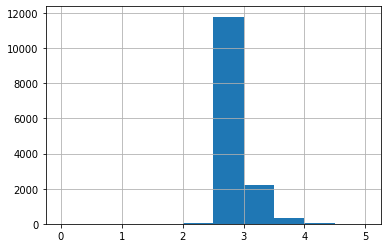

In [35]:
display(data['ceiling_height'].hist(bins=10, range=(0,5)));
display(data.loc[data['ceiling_height'] > 11])

Так и есть, большинство объявлений с высотой потолков в районе от 2.5 до 3м. Разделим выбивающиеся данные значения на 10

In [36]:
data.loc[data['ceiling_height'] > 11, 'ceiling_height'] = data['ceiling_height'] / 10

Проверяем что получилось

In [37]:
print(data['ceiling_height'].sort_values().unique())

[ 1.    1.2   1.4   1.75  2.    2.2   2.25  2.26  2.3   2.34  2.4   2.45
  2.46  2.47  2.48  2.49  2.5   2.51  2.52  2.53  2.54  2.55  2.56  2.57
  2.58  2.59  2.6   2.61  2.62  2.63  2.64  2.65  2.66  2.67  2.68  2.69
  2.7   2.71  2.72  2.73  2.74  2.75  2.76  2.77  2.78  2.79  2.8   2.81
  2.82  2.83  2.84  2.85  2.86  2.87  2.88  2.89  2.9   2.91  2.92  2.93
  2.94  2.95  2.96  2.97  2.98  2.99  3.    3.01  3.02  3.03  3.04  3.05
  3.06  3.07  3.08  3.09  3.1   3.11  3.12  3.13  3.14  3.15  3.16  3.17
  3.18  3.2   3.21  3.22  3.23  3.24  3.25  3.26  3.27  3.28  3.29  3.3
  3.31  3.32  3.33  3.34  3.35  3.36  3.37  3.38  3.39  3.4   3.42  3.43
  3.44  3.45  3.46  3.47  3.48  3.49  3.5   3.51  3.52  3.53  3.54  3.55
  3.56  3.57  3.58  3.59  3.6   3.62  3.63  3.65  3.66  3.67  3.68  3.69
  3.7   3.75  3.76  3.78  3.8   3.82  3.83  3.84  3.85  3.86  3.87  3.88
  3.9   3.93  3.95  3.98  4.    4.06  4.1   4.14  4.15  4.19  4.2   4.25
  4.3   4.37  4.4   4.45  4.5   4.65  4.7   4.8   4.

Согласно постановлению правительства РФ от 28.01.2006 N 47 отметка в 2.1 метра является минимальной. Заполним пропуски медианой и затем уберем значения менее 2.1 метра

In [38]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == t), 'ceiling_height'].median()

In [39]:
data = data[data['ceiling_height'] >= 2.1] 

In [40]:
#Проверка
print(data['ceiling_height'].sort_values().unique())

[ 2.2    2.25   2.26   2.3    2.34   2.4    2.45   2.46   2.47   2.48
  2.49   2.5    2.51   2.52   2.525  2.53   2.54   2.55   2.56   2.56
  2.57   2.575  2.58   2.59   2.6    2.6    2.61   2.615  2.62   2.625
  2.63   2.64   2.65   2.65   2.66   2.67   2.675  2.68   2.69   2.7
  2.71   2.72   2.725  2.73   2.74   2.75   2.76   2.77   2.78   2.79
  2.8    2.81   2.82   2.83   2.84   2.85   2.86   2.87   2.88   2.89
  2.9    2.91   2.92   2.93   2.94   2.95   2.96   2.97   2.98   2.99
  3.     3.01   3.02   3.03   3.04   3.05   3.06   3.07   3.08   3.09
  3.1    3.11   3.12   3.13   3.14   3.15   3.16   3.17   3.18   3.2
  3.21   3.22   3.23   3.24   3.25   3.26   3.27   3.28   3.29   3.3
  3.31   3.32   3.33   3.34   3.35   3.36   3.37   3.38   3.39   3.4
  3.42   3.43   3.44   3.45   3.46   3.47   3.48   3.49   3.5    3.51
  3.52   3.53   3.54   3.55   3.56   3.57   3.58   3.59   3.6    3.62
  3.63   3.65   3.66   3.67   3.68   3.69   3.7    3.75   3.76   3.78
  3.8    3.82   3.83   

Перейдем к жилой площади и площадки кухни. Рассматривая жилую площадь, возьмем медиану согласно пропорции к общей площади. Сразу проверим, состояние корректности данных, чтобы общая площадь была больше суммы площадей кухни и жилой площади.

In [41]:
for i in data['rooms'].unique():
    ratio = (data[data['rooms'] == i]['living_area'] / data[data['rooms'] == i]['total_area']).median()
    data['living_area'] = data['living_area'].fillna(value = data['total_area'] * ratio)

Для площади кухни укажем, что в случае со студиями - кухни нет и площадь кухни = 0

In [42]:
data.loc[(data['studio'] == True), 'kitchen_area'] = 0

Проверяем:

In [43]:
#data['kitchen_area'].sort_values().unique()

Обнаружены значения '    nan'. Это не пропуски, а прописанное значение, их как и настоящие пропуски заменим медианой,учитывая условие об общей площади

In [44]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) \
             & (data['total_area']) \
             & (data['kitchen_area'].isna()) \
             | (data['kitchen_area'] == '   nan'), 'kitchen_area'] = \
    data.loc[(data['rooms'] == t), 'kitchen_area'].median()

По действующему законодательству, минимальная площадь кухни, допускаемая нормативом для однокомнатных квартир — 5 кв.м., значения меньше - отбрасываем (не исключая нулевого значения для студий)

**Проверим еще раз и переформатируем типы данных с обработанными пропусками**

In [45]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23553 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23553 non-null  int64         
 1   last_price            23553 non-null  int64         
 2   total_area            23553 non-null  float64       
 3   first_day_exposition  23553 non-null  datetime64[ns]
 4   rooms                 23553 non-null  int64         
 5   ceiling_height        23553 non-null  float64       
 6   floors_total          23468 non-null  float64       
 7   living_area           23553 non-null  float64       
 8   floor                 23553 non-null  int64         
 9   is_apartment          23553 non-null  bool          
 10  studio                23553 non-null  bool          
 11  open_plan             23553 non-null  bool          
 12  kitchen_area          23553 non-null  float64       
 13  balcony         

In [46]:
# check
#data.shape[0]

In [47]:
data = data[(data['kitchen_area'] >= 5)\
            | (data['kitchen_area'] == 0)\
            | (data['kitchen_area'].isna())] 

In [48]:
(data['total_area']*0.9 < (data['living_area'] + data['kitchen_area'])).sum()

918

Обнаружено 918 нереальных значений площади. Отфильтруем их.

In [49]:
#check
data.shape[0]

23449

In [50]:
data = data[data['total_area']*0.9 >= (data['living_area'] + data['kitchen_area'])]

In [51]:
#check
data.shape[0]

22531

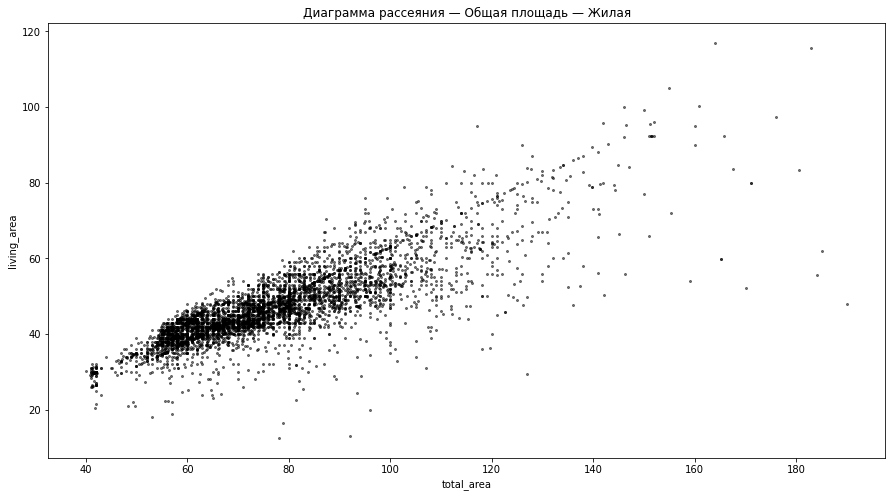

In [52]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'black', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

Переходим далее к локации и этажности дома. Я по прежнему рекомендовал бы удалить эти данные. Но так как в задание указано о необходимости сохранить, будем считать, что этаж в объявлении - последний. Также изменим тип данных на int. Ведь никто не живет на 3,5 этаже.

In [53]:
for i in data['rooms'].unique():
    ratio = (data[data['rooms'] == i]['living_area'] / data[data['rooms'] == i]['total_area']).median()
    data['living_area'] = data['living_area'].fillna(value = data['total_area'] * ratio)

Нормы жилой площади регламентированы в зависимости от количества жильцов на уровне местного законодательства. Так что здесь мы уберем площадь менее 6кв.м. (по санитарным нормам положено именно столько на человека), так как мы не знаем сколько жильцов планируется или прописано на данный момент.

In [54]:
data = data[data['living_area'] >= 6]

In [55]:
#check
#data.shape[0]

Убрали 6 квартир с неподходящими условиями жил площади

In [56]:
data['floors_total'] = data['floors_total'].fillna(data['floor']).astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)
data['floor'] = data['floor'].astype(int)

In [57]:
print(data.isna().sum().sort_values())

total_images             0
ponds_around3000         0
nearest_park_km          0
parks_around3000         0
city_center              0
nearest_airport_km       0
balcony                  0
kitchen_area             0
open_plan                0
nearest_ponds_km         0
studio                   0
floor                    0
living_area              0
floors_total             0
ceiling_height           0
rooms                    0
first_day_exposition     0
total_area               0
last_price               0
is_apartment             0
days_exposition          0
locality_name           13
dtype: int64


#### Обработаем аномальные и выбивающиеся значения

In [58]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median', 'mean'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,525.00","22,525.00","22,525.00","22,525.00","22,525.00","22,525.00","22,525.00","22,525.00","22,525.00"
min,0.00,15.50,2.25,-1.00,"12,190.00",6.00,0.00,1.00,1.00
max,19.00,900.00,10.30,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00
median,2.00,52.40,2.70,74.00,"4,700,000.00",30.20,9.06,4.00,9.00
mean,2.09,60.85,2.70,157.73,"6,584,530.71",34.89,10.30,5.90,10.69


In [59]:
data['rooms'].value_counts().sort_values()

15       1
16       1
19       1
12       1
14       2
11       2
10       3
9        8
8       11
7       59
6       97
0      187
5      313
4     1131
3     5608
1     7443
2     7657
Name: rooms, dtype: int64

Значение от от 7 комнаты и выше можно считать аномальными и очистить, т.к. они только испортят нам анализ.

In [60]:
data = data[data['rooms'] < 8]

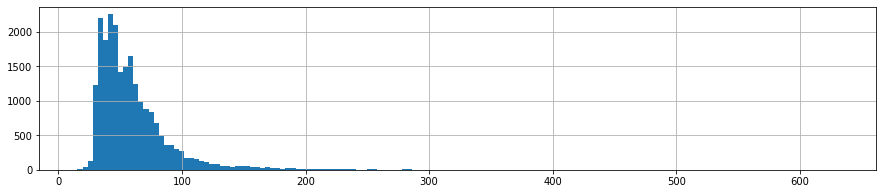

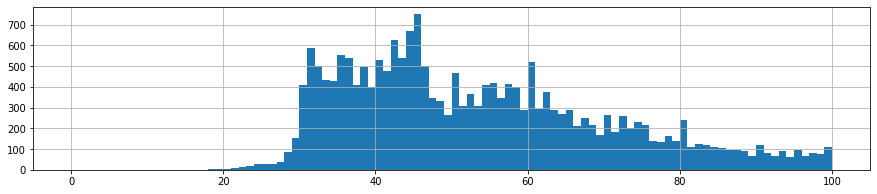

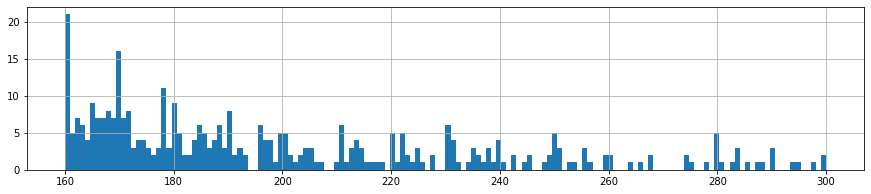

In [61]:
data['total_area'].hist(bins = 150, figsize = (15,3));
plt.show()
data['total_area'].hist(bins = 100, figsize = (15,3), range = (0,100));
plt.show()
data['total_area'].hist(bins = 150, figsize = (15,3), range = (160,300));
plt.show()

Исключим квартиры менее 20 и более 250 метров

In [62]:
data = data[data['total_area'] > 20]

In [63]:
data = data[data['total_area'] <= 250]

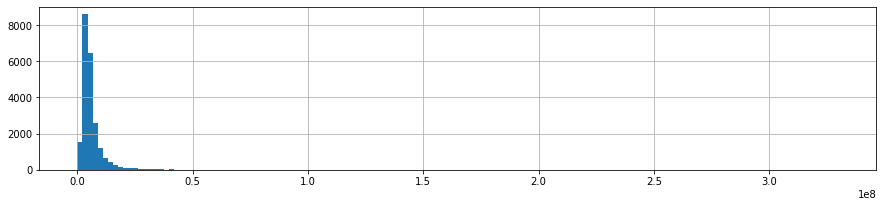

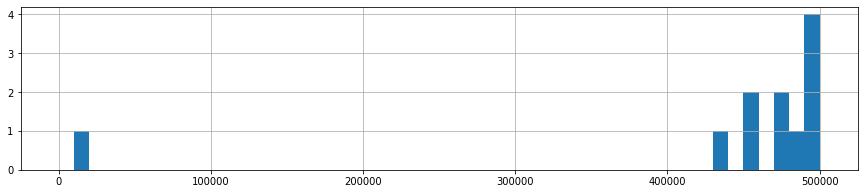

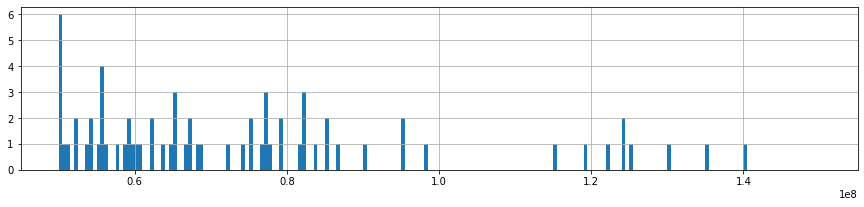

In [64]:
data['last_price'].hist(bins = 150, figsize = (15,3));
plt.show()
data['last_price'].hist(bins = 50, figsize = (15,3), range = (0,500000));
plt.show()
data['last_price'].hist(bins = 200, figsize = (15,3), range = (50000000, 150000000));

In [65]:
data['last_price'].describe()

count    2.239400e+04
mean     6.223806e+06
std      6.999153e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.680000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [66]:
kvartira = 0
for i in data['last_price']:
    if i < 400000:
        kvartira +=1
    if i > 100000000:
        kvartira +=1
kvartira

14

Замечена минимальная стоимость квартиры в 12190 рублей. Необходимо её исключить, возможно объявление должно было попасть в категорию аренды а не продажи. Цены более 100 млн, так же выбиваются, исключим объявления до 400 тыс. и более 100 млн.

In [67]:
data = data[data['last_price'] > 400000]
data = data[data['last_price'] < 100000000]

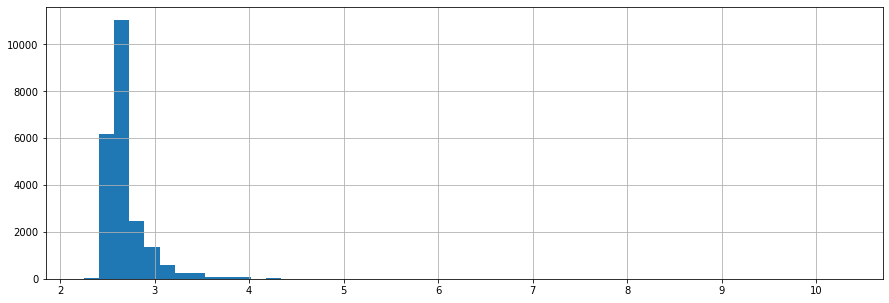

In [68]:
data['ceiling_height'].hist( bins = 50, figsize = (15,5))
plt.show()

Значения больше 4м и менее 2.5м исключим

In [69]:
data.shape[0]

22380

In [70]:
data = data[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 4)]

In [71]:
data.shape[0]

22290

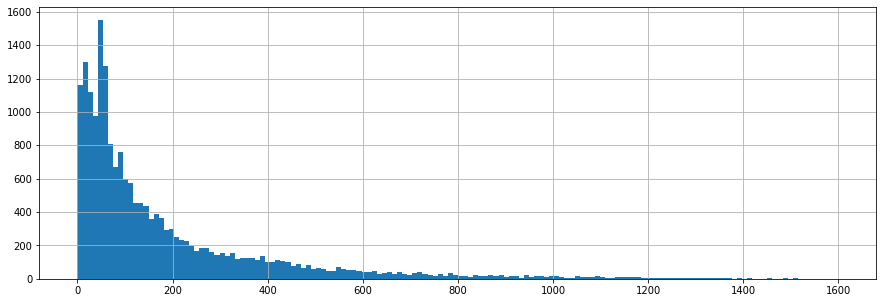

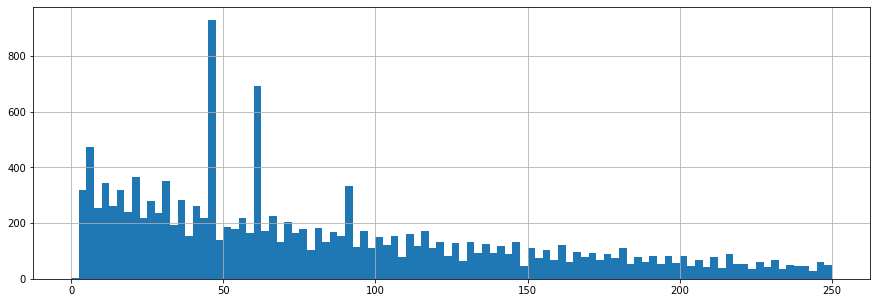

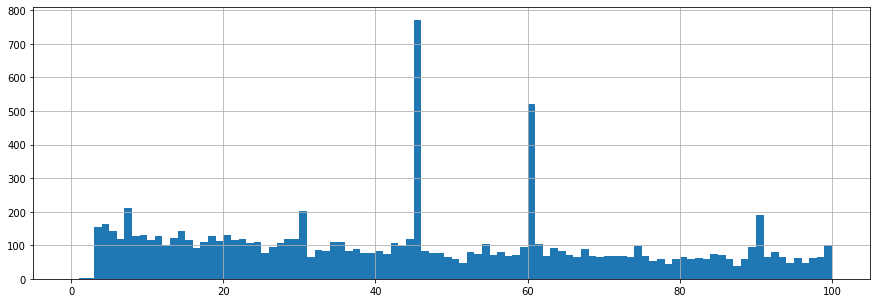

count    19313.000000
mean       181.559986
std        220.161291
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [72]:
data[data['days_exposition'] != -1]['days_exposition'].hist( bins = 150, figsize = (15,5), range = (0,1600));
plt.show()
data[data['days_exposition'] != -1]['days_exposition'].hist(bins = 100, figsize = (15,5),grid = True, range = (0, 250));
plt.show()
data[data['days_exposition'] != -1]['days_exposition'].hist(bins = 100, figsize = (15,5),grid = True, range = (0,100));
plt.show()
display(data[data['days_exposition'] != -1]['days_exposition'].describe())

Обнаружены выбросы согласно первому квантилю на сроке размещения объявлений в 45 дней. Далее 60 и 90 дней.По условиям площадки "Яндекс недвижимости" объявления автоматически снимаются как раз в эти три промежутка времени. По-хорошему необходимо обратиться к сайнтистам, чтобы данные по сроку были отфильтрованы, дабы объявления с "ручным" снятием остались. Для целостности картины уберем эти дни из данных.

In [73]:
data.shape[0]

22290

In [74]:
data_good_day = data[(data['days_exposition'] != 45)\
                     & (data['days_exposition'] != 60)\
                     & (data['days_exposition'] != 90)]

In [75]:
data_good_day.shape[0]

20810

Если мы удалим эти данные, мы потеряем более 10 % от исходных данных. Изначально было представлено 23699 объявлений. Поэтому  мы можем записать их в отдельный дата фрейм. После добавления новых столбцов в пункте 4, переменную data_good_day перезапишем с новыми столбцами.

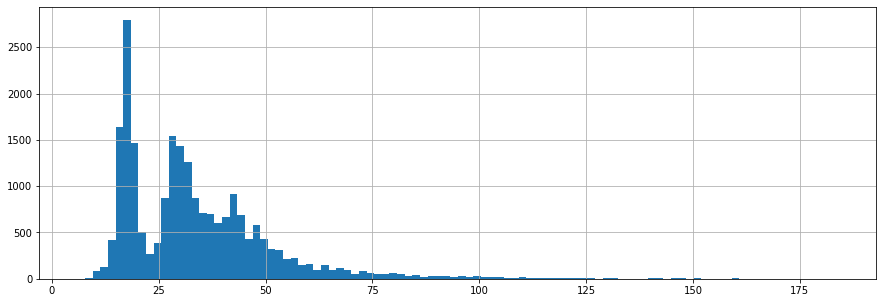

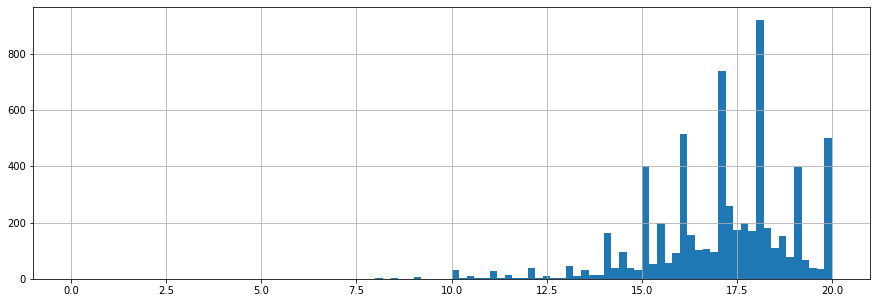

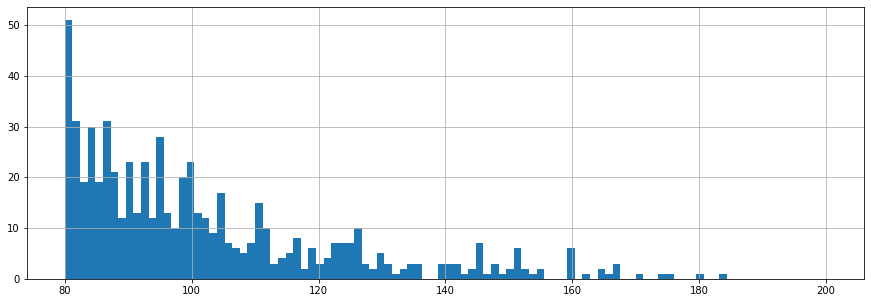

count    22290.000000
mean        33.963533
std         18.373683
min          6.000000
25%         19.000000
50%         30.100000
75%         42.200000
max        184.000000
Name: living_area, dtype: float64

In [76]:
data['living_area'].hist(bins = 100, grid = True, figsize = (15,5));
plt.show()
data['living_area'].hist(bins = 100, grid = True, figsize = (15,5), range = (0,20));
plt.show()
data['living_area'].hist(bins = 100, grid = True, figsize = (15,5), range = (80,200));
plt.show()
data['living_area'].describe()

Квартиры с площадью в 100м и более представлены в слишком малом количестве для достоверной оценки, можно считать их выбросами для нашего исследования как и квартиры с жилой площадью до 10м

In [77]:
data = data[(data['living_area'] >= 10) & (data['living_area'] <= 100)]

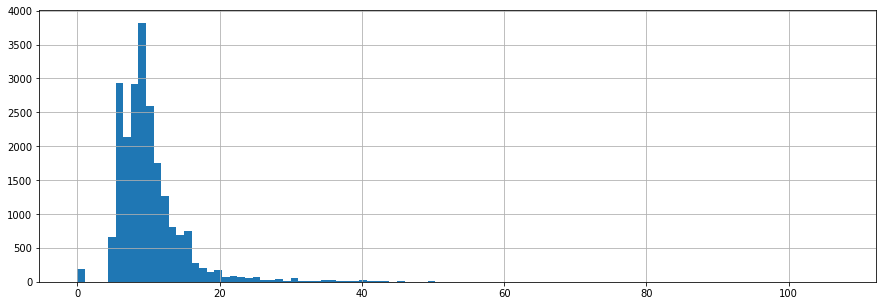

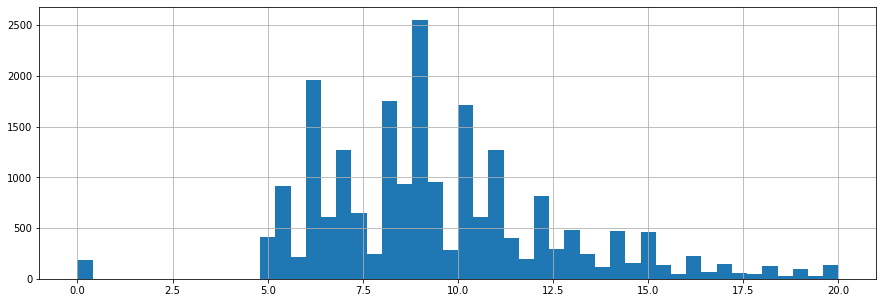

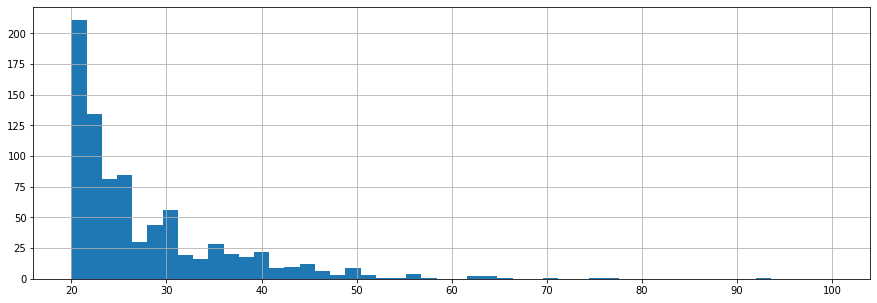

count    22027.000000
mean        10.086253
std          4.967912
min          0.000000
25%          7.100000
50%          9.000000
75%         11.200000
max        107.000000
Name: kitchen_area, dtype: float64

In [78]:
data['kitchen_area'].hist(bins = 100, grid = True, figsize = (15,5));
plt.show()
data['kitchen_area'].hist(bins = 50, grid = True, figsize = (15,5), range=(0,20));
plt.show()
data['kitchen_area'].hist(bins = 50, grid = True, figsize = (15,5), range=(20,100));
plt.show()
data['kitchen_area'].describe()

Для сбалансированности выборки оставим данные с площадью кухни до 50м.

In [79]:
data = data[(data['kitchen_area'] <= 50) | (data['kitchen_area'] == 0)]

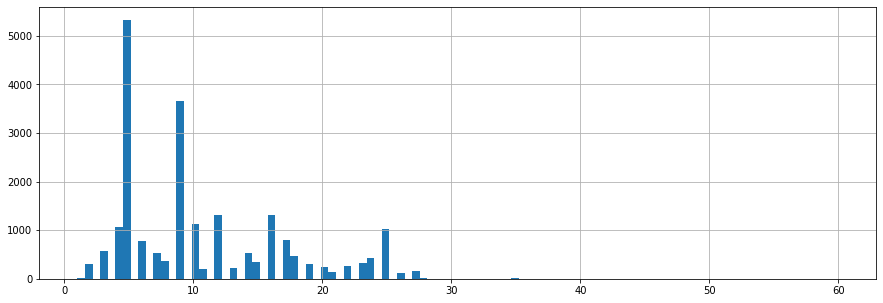

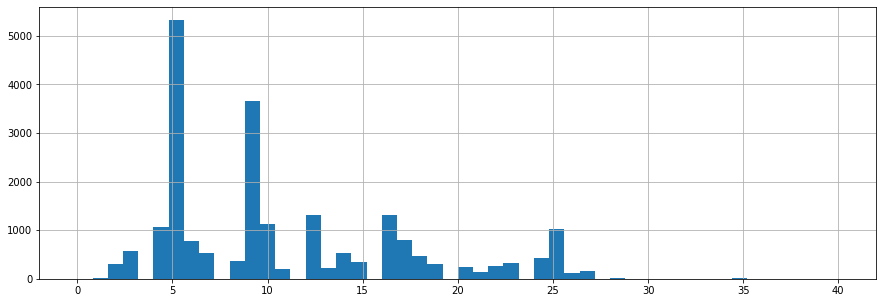

count    22006.000000
mean        10.774289
std          6.567330
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [80]:
data['floors_total'].hist(bins = 100, grid = True, figsize = (15,5));
plt.show()
data['floors_total'].hist(bins = 50, grid = True, figsize = (15,5), range=(0, 40));
plt.show()
data['floors_total'].describe()

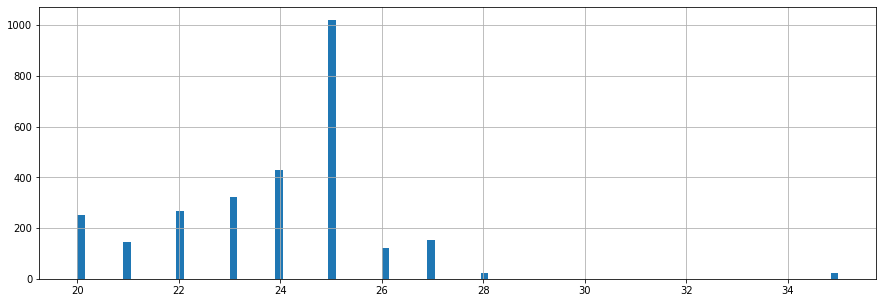

In [81]:
data['floors_total'].hist(bins = 100, grid = True, figsize = (15,5), range=(20, 35));

Пик объявлений идет на пятиэтажки. Без зазрений совести убираем высотки, у которых этажей больше 27.

In [82]:
data = data[data['floors_total'] <= 27]

**Вывод по предобработке данных:**<br>
Пропуски, которые была возможность скорректировать - скорректированы. Форматы значений в данных изменены. Данные, которые невозможно было расчитать мы заменили заглушками. Высоту потолков, жилую площадь и площадь кухни подобрали по медианным значениям. Выбивающиеся данные были убраны из исследования. По заданию расстояние до центра города необходимо не трогать и далее создать новый столбец в КМ, для удобства  остальные значения, содержащие расстояния были переведены из `м` в `км` в своих столбцах, не создавая новых. В названиях городов были исключены типы населенных пунктов в связи с слишком большим пересечением (ПГТ, Поселок и пр.) для исключения дубликатов и отображения полной картины. Пропуски в именах городов были оставлены, так как природа этих пропусков непонятна и их нечем заменить. Для более точного анализа и сбалансированности выборки были удалены 7,4% данных, содержащие "вредные" аномальные значения.

#### check gap

In [83]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21956 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21956 non-null  int64         
 1   last_price            21956 non-null  int64         
 2   total_area            21956 non-null  float64       
 3   first_day_exposition  21956 non-null  datetime64[ns]
 4   rooms                 21956 non-null  int64         
 5   ceiling_height        21956 non-null  float64       
 6   floors_total          21956 non-null  int64         
 7   living_area           21956 non-null  float64       
 8   floor                 21956 non-null  int64         
 9   is_apartment          21956 non-null  bool          
 10  studio                21956 non-null  bool          
 11  open_plan             21956 non-null  bool          
 12  kitchen_area          21956 non-null  float64       
 13  balcony         

In [84]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,956.00","21,956.00","21,956.00","21,956.00","21,956.00","21,956.00","21,956.00","21,956.00","21,956.00"
min,0.00,20.50,2.50,-1.00,"430,000.00",10.00,0.00,1.00,1.00
max,7.00,240.00,4.00,"1,580.00","98,000,000.00",100.00,50.00,27.00,27.00


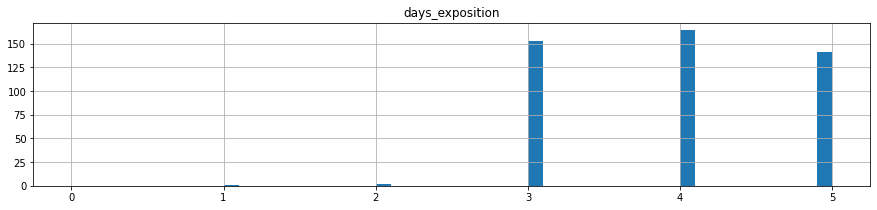

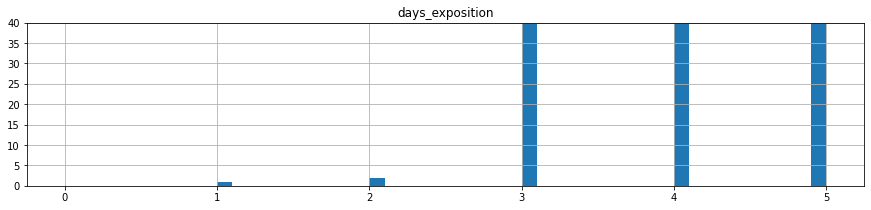

In [85]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [86]:
    (
        data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
              'floor', 'floors_total']]
        .apply (['count', 'min', 'max', 'mean', 'median'])   
        .style.format("{:,.2f}")
    )

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,956.00","21,956.00","21,956.00","21,956.00","21,956.00","21,956.00","21,956.00","21,956.00","21,956.00"
min,0.00,20.50,2.50,-1.00,"430,000.00",10.00,0.00,1.00,1.00
max,7.00,240.00,4.00,"1,580.00","98,000,000.00",100.00,50.00,27.00,27.00
mean,2.03,57.78,2.69,156.29,"5,867,782.45",32.98,10.03,5.90,10.72
median,2.00,52.00,2.70,74.00,"4,633,500.00",30.00,9.00,4.00,9.00


### Посчитаем и добавим в таблицу новые столбцы

#### Далее рассчитаем и добавим новые столбцы: отдельно день, месяц и год публикации объявления; сгруппируем этажи

In [94]:
data['price_per_m'] = data['last_price']/data['total_area']

In [95]:
data['city_center_km'] = (data[data['city_center'] != -1]['city_center']/1000).round()
data['city_center_km'] = data['city_center_km'].fillna(value=-1)

Заглушки переносим так же в новый столбец.

In [96]:
data['day_of_publ'] = data['first_day_exposition'].dt.weekday

In [97]:
data['month_of_publ'] = data['first_day_exposition'].dt.month

In [98]:
data['year_of_publ'] = data['first_day_exposition'].dt.year

In [99]:
data['floors_total'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [100]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [101]:
data['floor_group'] = data.apply(floor_group, axis=1)

**Новые столбцы добавлены в таблицу корректно.**
#### Перезапишем датафрейм data_good_day

In [103]:
data_good_day = data[(data['days_exposition'] != 45)\
                     & (data['days_exposition'] != 60)\
                     & (data['days_exposition'] != 90)]

### Исследовательский анализ данных

#### Построим гистограммы для исследования представленных данных

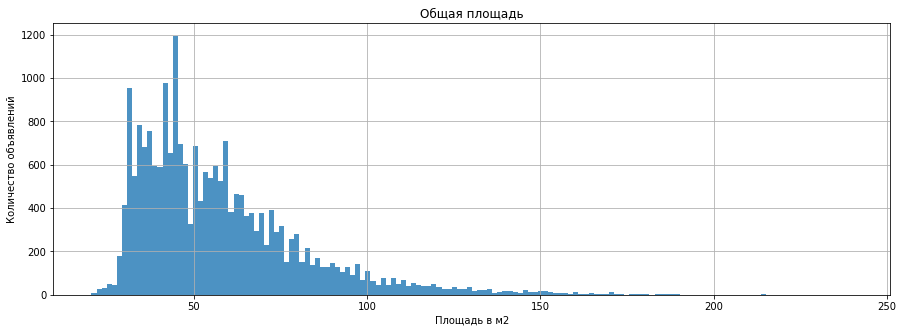

count    21956.000000
mean        57.784339
std         24.583254
min         20.500000
25%         40.300000
50%         52.000000
75%         68.500000
max        240.000000
Name: total_area, dtype: float64

In [104]:
ax = data.total_area.plot.hist(bins = 150, grid = True, figsize = (15,5), alpha=0.8)
ax.set_title('Общая площадь')
ax.set_xlabel('Площадь в м2')
ax.set_ylabel('Количество объявлений')
plt.show()
display(data['total_area'].describe())

Большинство квартир с площадью в пределах 60 кв.метров. Скорее всего это связано с тем, что студии, однокомнатные и двухкомнатные квартиры - самые частые участники рынка недвижимости. Согласно жилищному кодексу - минимальная установленная санитарная норма составляет 6 кв. м на человека. Законодательно застройщики никак не ограничены в строительстве маленького жилья, санитарные нормы тут не нарушаются и минимальная квартира в 20,5м попадает в нормы.

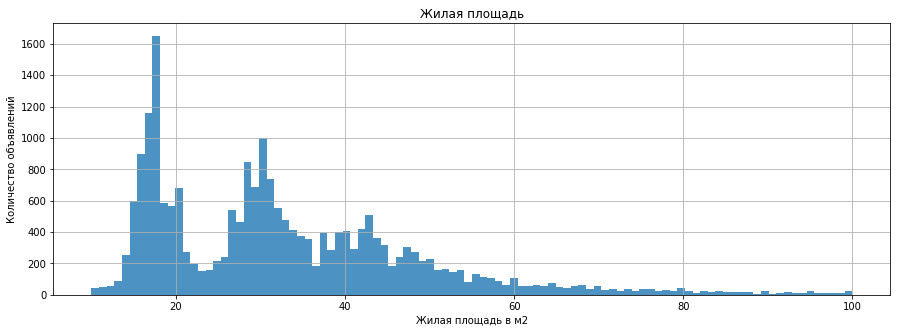

count    21956.000000
mean        32.976860
std         15.738379
min         10.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        100.000000
Name: living_area, dtype: float64

In [105]:
ax = data.living_area.plot.hist(bins=100,grid=True, figsize = (15,5), alpha=0.8)
ax.set_title('Жилая площадь')
ax.set_xlabel('Жилая площадь в м2')
ax.set_ylabel('Количество объявлений')
plt.show()
display(data['living_area'].describe())

Минимальная жилая площадь в 6км м. соблюдена. Опять же прослеживается высокий спрос однокомнатный и двухкомнатные квартиры. Основная масса объявлений с жилой площадью до 50 квадратных метров.

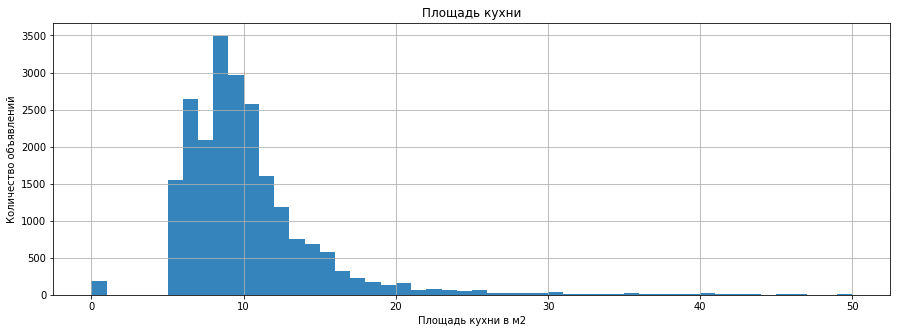

count    21956.000000
mean        10.028989
std          4.664439
min          0.000000
25%          7.100000
50%          9.000000
75%         11.200000
max         50.000000
Name: kitchen_area, dtype: float64

In [106]:
ax = data.kitchen_area.plot.hist(bins=50,grid=True, figsize = (15,5), alpha=0.9)
ax.set_title('Площадь кухни')
ax.set_xlabel('Площадь кухни в м2')
ax.set_ylabel('Количество объявлений')
plt.show()
display(data['kitchen_area'].describe())

В студиях отсутвует кухня как таковая, поэтому значение в 0 вполне нормальное. Основная масса объявлений с площадью кухни до 18 метров. Учитывая высокие спрос на 1 и 2-ух комнатные, 18 квадратных метров - это более чем достаточно. Максимальная площадь же составила 112 кв.м., что тоже вполне нормально, если в доме например два помещения кухонного типа.

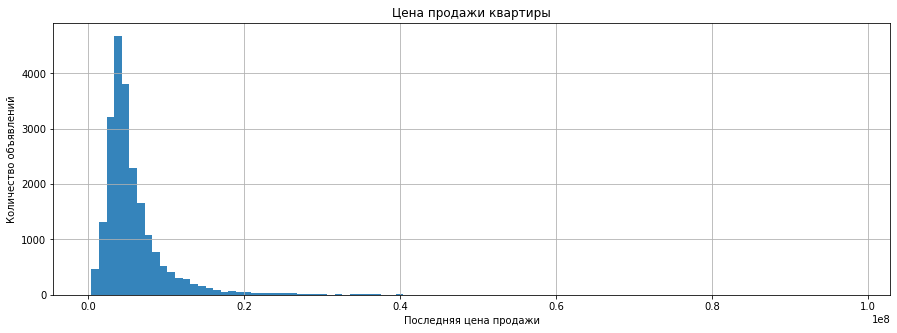

count    2.195600e+04
mean     5.867782e+06
std      4.868560e+06
min      4.300000e+05
25%      3.490000e+06
50%      4.633500e+06
75%      6.615000e+06
max      9.800000e+07
Name: last_price, dtype: float64

In [107]:
ax = data.last_price.plot.hist(bins=100,grid=True, figsize = (15,5), alpha=0.9)
ax.set_title('Цена продажи квартиры')
ax.set_xlabel('Последняя цена продажи')
ax.set_ylabel('Количество объявлений')
plt.show()
display(data['last_price'].describe())

Согласно гистограмме большинство квартир не превышает стоимость в 5 миллионов. Минимальная стоимость в 430 тысяч вполне возможна, например в деревне с малым количеством жителей такие цены вполне реальны

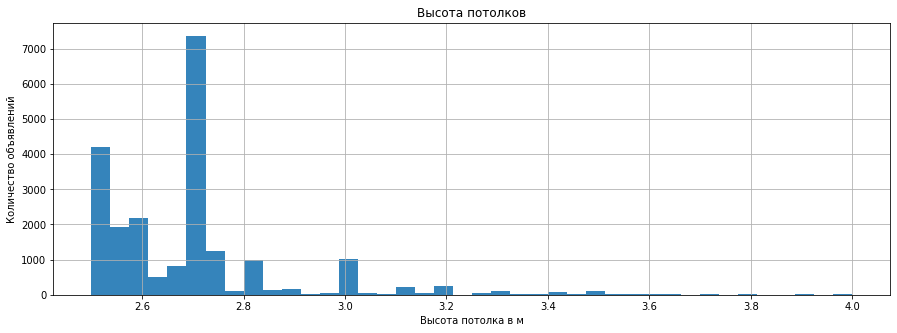

count    21956.000000
mean         2.693599
std          0.198119
min          2.500000
25%          2.550000
50%          2.700000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

In [108]:
ax = data.ceiling_height.plot.hist(bins=40,grid=True, figsize = (15,5), alpha=0.9)
ax.set_title('Высота потолков')
ax.set_xlabel('Высота потолка в м')
ax.set_ylabel('Количество объявлений')
plt.show()
display(data['ceiling_height'].describe())

После сортировки данных высота потолков большинства объявлений не переходит границы в 3 метра. Медиана представляет большинство объявлений с высотой потолков в 2,7м. Здесь всё в порядке.

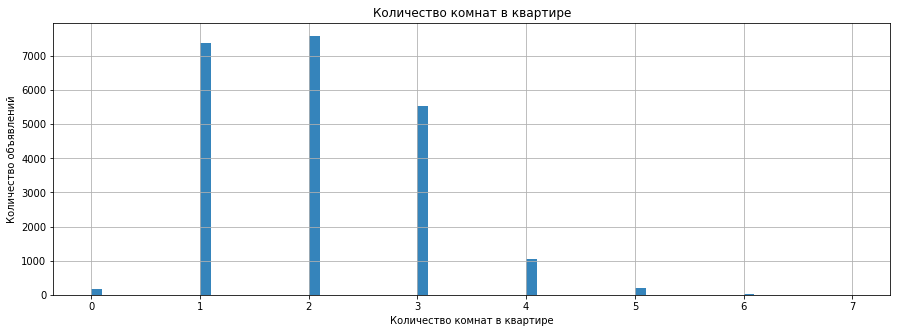

count    21956.000000
mean         2.027009
std          0.955989
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

In [109]:
ax = data.rooms.plot.hist(bins=70,grid=True, figsize = (15,5), alpha=0.9)
ax.set_title('Количество комнат в квартире')
ax.set_xlabel('Количество комнат в квартире')
ax.set_ylabel('Количество объявлений')
plt.show()
display(data['rooms'].describe())

Большинство квартир на продаже однокомнатные, либо двухкомнатные(они преобладают). Это нормально, движение однокомнатных и двухкомнатных квартир всегда большое. Далее уже идут более редкие объявления,5,6 и 7-ми комнатные квартиры имеют малое движение на рынке недвижимости. 

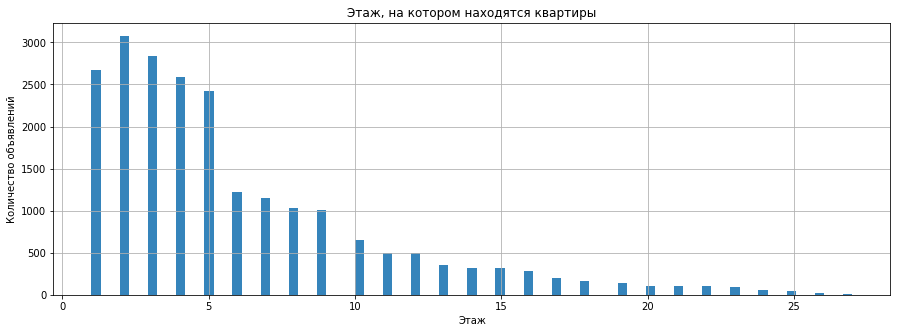

count    21956.000000
mean         5.901940
std          4.840305
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

In [110]:
ax = data.floor.plot.hist(bins=81,grid=True, figsize = (15,5), alpha=0.9)
ax.set_title('Этаж, на котором находятся квартиры')
ax.set_xlabel('Этаж')
ax.set_ylabel('Количество объявлений')
plt.show()
display(data['floor'].describe())

В большинстве объявлений квартира расположена до 5 этажа. Самый популярный это второй этаж. Скорее всего это связано с большим количеством пятиэтажек. Стоит заметить, что многоэтажных новостроек достаточно мало, но и не стоит забывать, что Санкт-Петербург и Ленинградская область богата именно на исторические достопримечательности, и новостройки можно поставить лишь в новых районах или в близлежащих городах. В населенных пунктах с малым количеством жителей просто нецелесообразно строить высотки. Здесь все логично.

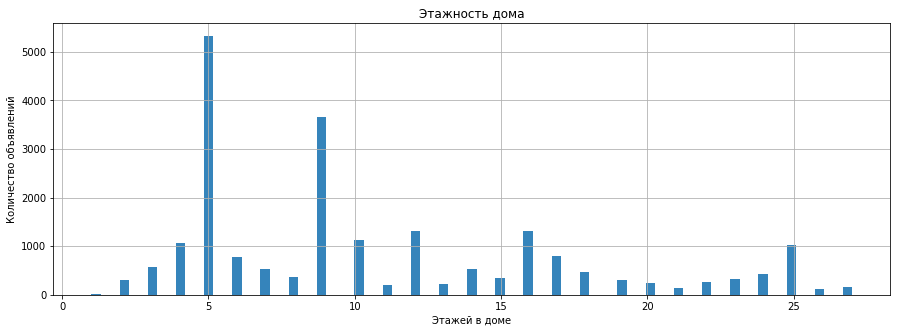

count    21956.000000
mean        10.724130
std          6.483924
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         27.000000
Name: floors_total, dtype: float64

In [111]:
ax = data.floors_total.plot.hist(bins=81,grid=True, figsize = (15,5), alpha=0.9)
ax.set_title('Этажность дома')
ax.set_xlabel('Этажей в доме')
ax.set_ylabel('Количество объявлений')
plt.show()
display(data['floors_total'].describe())

Теория подтвердилась, большинство объявлений представлено в пятиэтажных домах. Основная и самая "ходовая" группа это 5-ти и 9-ти этажки они составляют почти половину объявлений от всех квартир. Оставшаяся часть сосредоточена по 16-ти этажные дома, далее многоэтажки скорее в виде эксклюзивности и исключений, так как их достаточно мало. Можно увидеть новую застройку с 25-ти этажными домами.

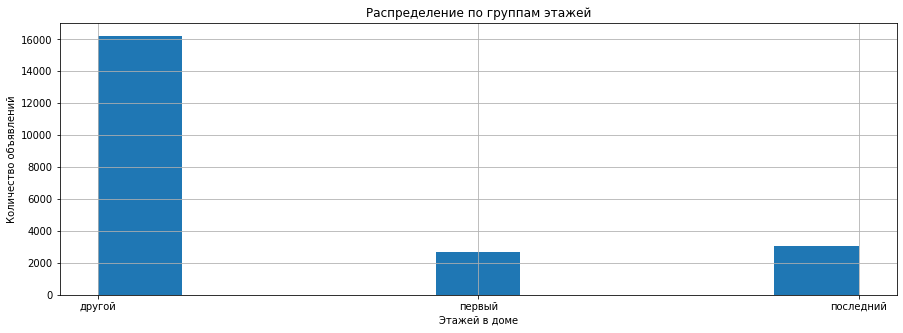

count      21956
unique         3
top       другой
freq       16214
Name: floor_group, dtype: object

In [112]:
ax = data['floor_group'].hist( bins=9, figsize = (15,5))
ax.set_title('Распределение по группам этажей')
ax.set_xlabel('Этажей в доме')
ax.set_ylabel('Количество объявлений')
plt.show()
display(data['floor_group'].describe())

С этажностью квартиры тоже всё ожидаемо, на первом этаже - риски ограбления, вандализма. На последнем - протечки крыши, проблемы с водоснабжением и др. риски. Обычно квартиры на первом этаже покупают пенсионеры - в связи с возрастом им тяжело ходить, т.к. в пятиэтажных домах лифт не предусмотрен, соответственно и объявлений о продаже так-же меньше остальных категорий, поэтому и продаж меньше. На последнем этаже не стоит забывать про аппартаменты, которые могут представлять собой двухэтажную квартиру. Здесь всё ожидаемо

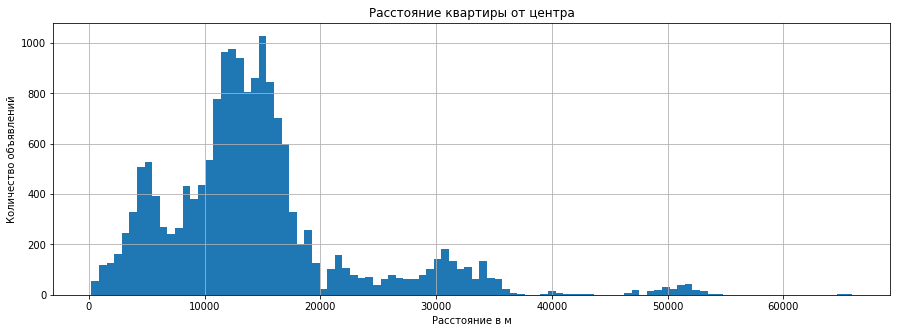

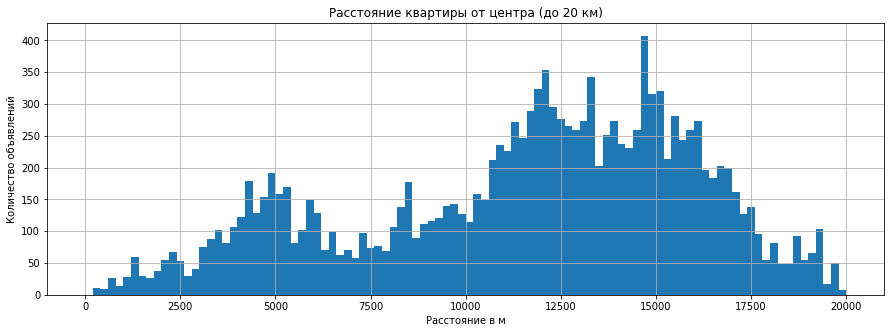

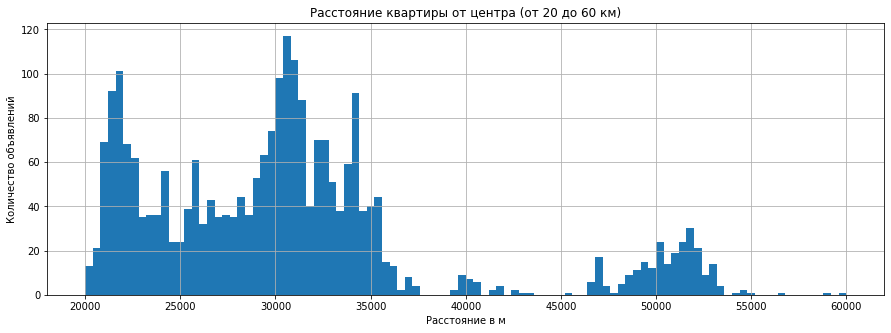

count    16911.000000
mean     14409.144817
std       8552.414534
min        208.000000
25%       9678.000000
50%      13229.000000
75%      16360.500000
max      65968.000000
Name: city_center, dtype: float64

In [113]:
ax = data[data['city_center'] != -1]['city_center'].hist(bins = 100, grid = True, figsize = (15,5));
ax.set_title('Расстояние квартиры от центра')
ax.set_xlabel('Расстояние в м')
ax.set_ylabel('Количество объявлений')
plt.show()
ax = data[data['city_center'] != -1]['city_center'].hist(bins = 100, grid = True, range = (0,20000), figsize = (15,5));
ax.set_title('Расстояние квартиры от центра (до 20 км)')
ax.set_xlabel('Расстояние в м')
ax.set_ylabel('Количество объявлений')
plt.show()
ax = data[data['city_center'] != -1]['city_center'].hist(bins = 100, grid = True, range = (20000,60000), figsize = (15,5));
ax.set_title('Расстояние квартиры от центра (от 20 до 60 км)')
ax.set_xlabel('Расстояние в м')
ax.set_ylabel('Количество объявлений')
plt.show()
display(data[data['city_center'] != -1]['city_center'].describe())

Исключив заглушки, мы получаем: максимальное значение, которое было найдено составляет 65968 метров или же почти 66 километров. Скорее всего расстояние указано до административного центра или до центра г.Санкт-Петербург. Есть объявления с квартирами, которые в шаговой доступности от центра города. Минимальное расстояние составило 208м. Большинство объявлений попадают в категорию до 15 км от центра города, что нормально даже для менее населенных областей.

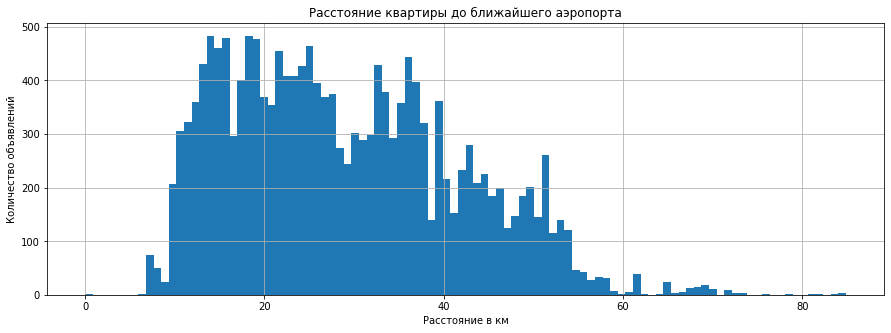

In [114]:
ax = data[data['nearest_airport_km'] != -1]['nearest_airport_km'].hist(bins = 100, grid = True, figsize = (15,5));
ax.set_title('Расстояние квартиры до ближайшего аэропорта')
ax.set_xlabel('Расстояние в км')
ax.set_ylabel('Количество объявлений')
plt.show()

Непонятно что с квартирами по 10-ый километр. Рассмотрим поближе

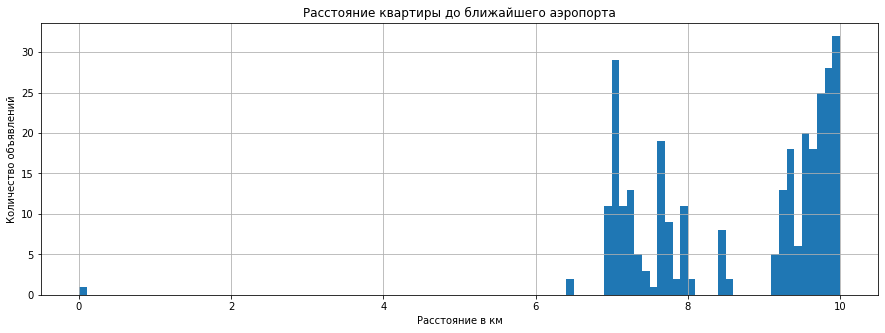

In [115]:
ax = data[data['nearest_airport_km'] != -1]['nearest_airport_km'].hist(bins = 100, grid = True, range = (0,10), figsize = (15,5));
ax.set_title('Расстояние квартиры до ближайшего аэропорта')
ax.set_xlabel('Расстояние в км')
ax.set_ylabel('Количество объявлений')
plt.show()

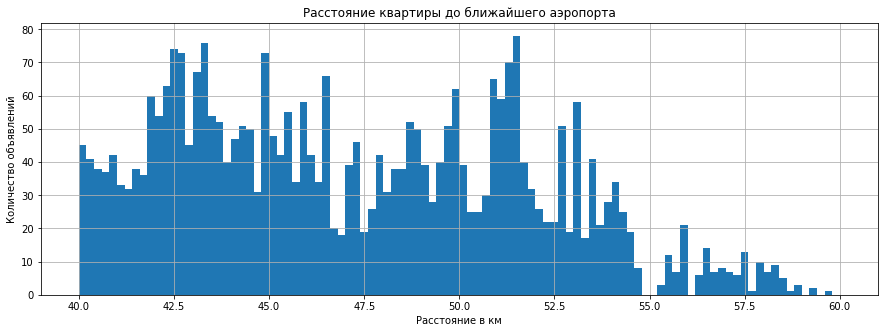

In [116]:
ax = data[data['nearest_airport_km'] != -1]['nearest_airport_km'].hist(bins = 100, grid = True, range = (40,60), figsize = (15,5));
ax.set_title('Расстояние квартиры до ближайшего аэропорта')
ax.set_xlabel('Расстояние в км')
ax.set_ylabel('Количество объявлений')
plt.show()

In [117]:
display(data[data['nearest_airport_km'] != -1]['nearest_airport_km'].describe())

count    16891.000000
mean        28.926417
std         12.735020
min          0.000000
25%         18.447500
50%         27.052000
75%         37.434000
max         84.869000
Name: nearest_airport_km, dtype: float64

Мы исключили заглушки и по представленной гистограмме можно увидеть, что нет объявлений в радиусе 1-7км от аэропорта. Распределение объявлений достаточно хаотично, например количество объявлений в 50км от аэропорта превышает количество объявлений в радиусе от 38 километров от взлётно-посадочной полосы. Но в целом можно сделать вывод, что квартиры больше продаются в радиусе до 40км.

count    7432.000000
mean        0.493513
std         0.344937
min         0.001000
25%         0.288000
50%         0.456000
75%         0.615000
max         3.190000
Name: nearest_park_km, dtype: float64

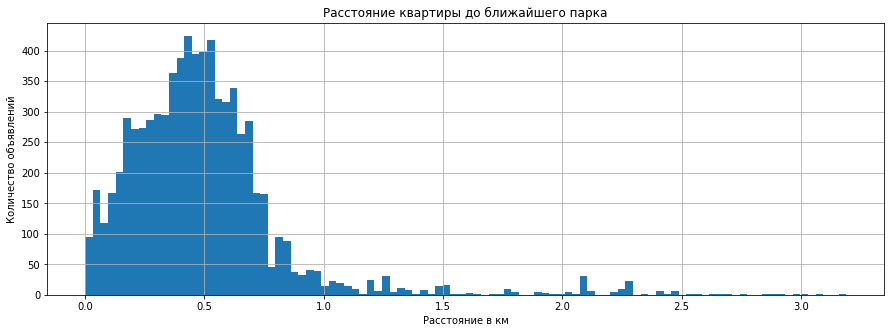

In [118]:
ax = data[data['nearest_park_km'] != -1]['nearest_park_km'].hist(bins = 100, grid = True, figsize = (15,5));
ax.set_title('Расстояние квартиры до ближайшего парка')
ax.set_xlabel('Расстояние в км')
ax.set_ylabel('Количество объявлений')
display(data[data['nearest_park_km'] != -1]['nearest_park_km'].describe())

Исключив заглушки, можно увидеть что в большинстве случаев квартиры находятся в радиусе менее километра. Минимальное найденное расстояние - 10 метров, максимальное составило: 3 километра и 190 метров. Скорее всего продавцы используют эту категорию в объявлении как преимущество, те кто не указал же расстояние до парка, оно скорее всего превышало 3км и не сыграло бы на руку продавцу. 

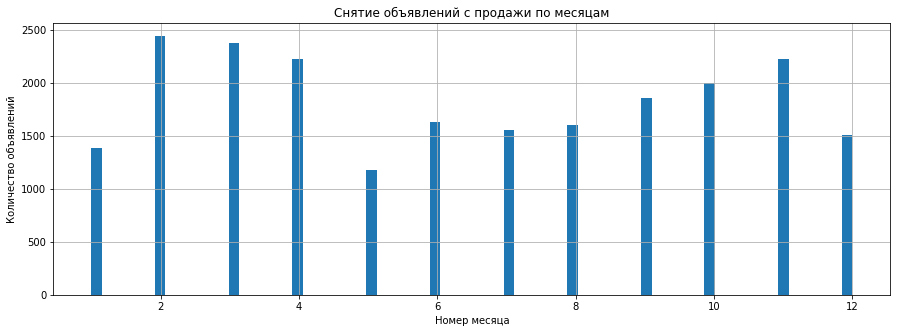

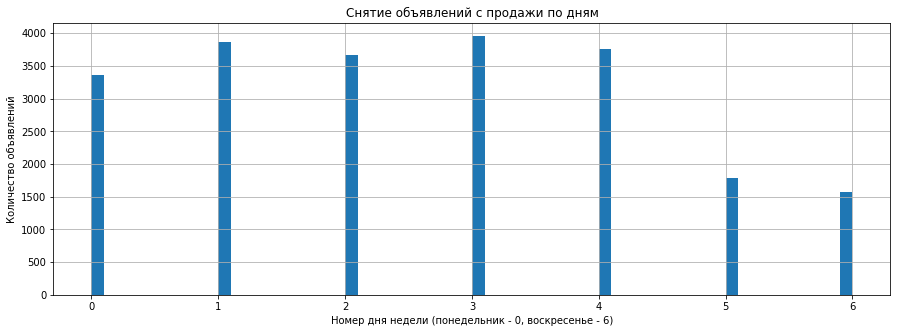

In [119]:
ax = data['month_of_publ'].hist(bins=72,figsize=(15, 5));
ax.set_title('Снятие объявлений с продажи по месяцам')
ax.set_xlabel('Номер месяца')
ax.set_ylabel('Количество объявлений')
plt.show()
ax = data['day_of_publ'].hist(bins=60,figsize=(15, 5));
ax.set_title('Снятие объявлений с продажи по дням')
ax.set_xlabel('Номер дня недели (понедельник - 0, воскресенье - 6)')
ax.set_ylabel('Количество объявлений')
plt.show()

По представленным гистограммам можно заметить сезонность продажи. То есть с февраля по апрель самые активные продажи далее идет ноябрью. Проседают по продажам больше всего - праздничные месяцы - январь, май и декабрь. В это время у людей достаточно много забот и они откладывают такую крупную покупку, как квартира. В то же время сразу же после январских праздников люди активизируются.В феврале идет пик продаж. Люди подбили бюджет, выбрали что им необходимо или вернулись к отложенному и решились на покупку в "новом году" с чистой головой. Ноябрь в свою очередь как раз "последний шанс" закрыть сделку в текущем году и ничего не откладывать на потом.<br>
По дням - продажи происходят в будни и складывается очевидный факт, что как минимум половину квартир продают через риэлторов, которые как и все по выходным отдыхают.<br>
Пик в феврале можно объяснить автоснятием прошлогодних объявлений с ноября по январь. Проверим эту теорию с помощью нашей переменной data_good_day, в которой мы убрали периоды автоснятия объявлений по сроку.

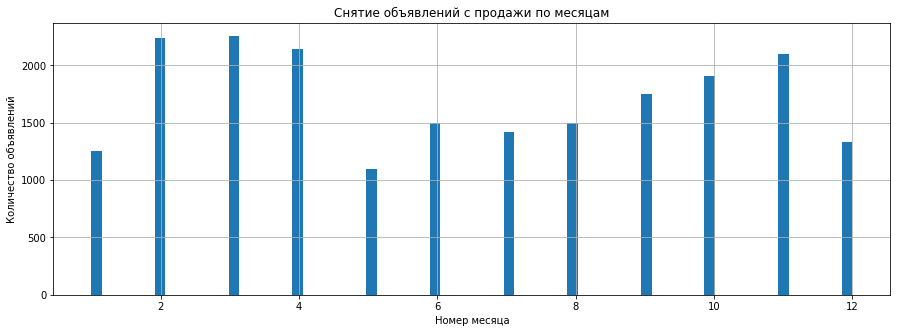

In [120]:
ax = data_good_day['month_of_publ'].hist(bins = 72,figsize=(15, 5));
ax.set_title('Снятие объявлений с продажи по месяцам')
ax.set_xlabel('Номер месяца')
ax.set_ylabel('Количество объявлений')
plt.show()

Действительно, пик объявлений теперь в марте, однако и февраль недалеко отстал. Теория подтвердилась лишь частично и видно меньшей спад с февраля по апрель.

#### Изучим, как быстро продавались квартиры

**Переходим к длительности продажи квартиры. Здесь возьмем отфильтрованный датафрейм для более корректного отображения картины**

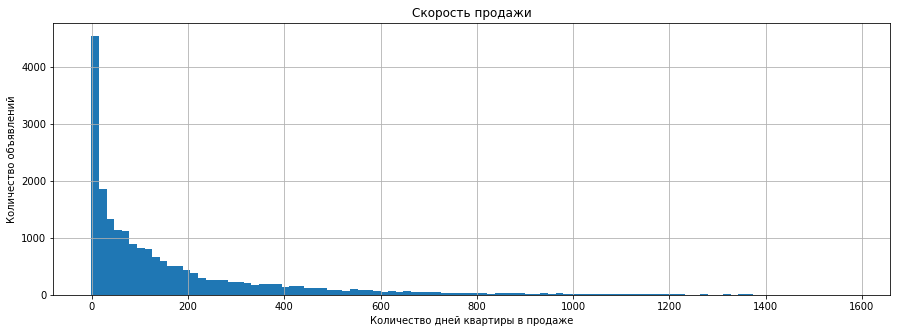

In [121]:
ax = data_good_day['days_exposition'].hist(bins=100,figsize=(15, 5));
ax.set_title('Скорость продажи')
ax.set_xlabel('Количество дней квартиры в продаже')
ax.set_ylabel('Количество объявлений')
plt.show()

Рассмотрим подробнее

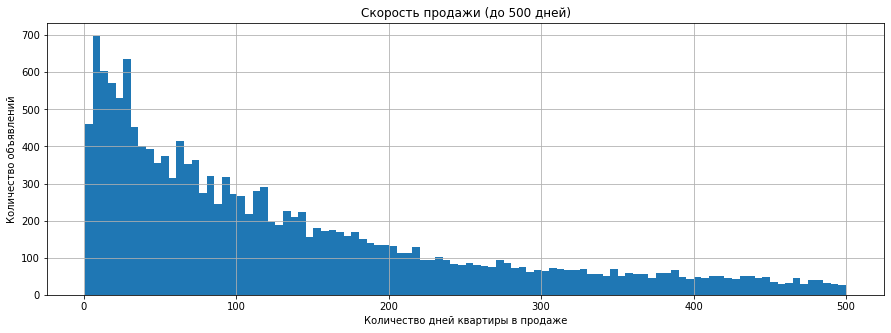

In [122]:
ax = data_good_day['days_exposition'].hist(bins = 100, grid = True, range = (1,500),figsize=(15, 5));
ax.set_title('Скорость продажи (до 500 дней)')
ax.set_xlabel('Количество дней квартиры в продаже')
ax.set_ylabel('Количество объявлений')
plt.show()

Сравним данные с учетом автоснятия объявлений и без

In [123]:
display(data_good_day[data_good_day['days_exposition'] != -1]['days_exposition'].describe())
display(data[data['days_exposition'] != -1]['days_exposition'].describe())

count    17599.000000
mean       190.498835
std        224.885525
min          1.000000
25%         41.000000
50%        110.000000
75%        249.000000
max       1580.000000
Name: days_exposition, dtype: float64

count    19065.000000
mean       180.143929
std        219.061498
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [124]:
display(data_good_day[data_good_day['days_exposition'] != -1]['days_exposition'].describe())

count    17599.000000
mean       190.498835
std        224.885525
min          1.000000
25%         41.000000
50%        110.000000
75%        249.000000
max       1580.000000
Name: days_exposition, dtype: float64

Самые быстрые продажи происходят в течение суток. Согласно нашим данным самая долгая продажа составляла 1580 дней , это более 4 лет. Быстрыми продажи можно считать до 41 дня (1,5 месяцев) поскольку покупка недвижимости не поход в продуктовый магазин. Потенциальные покупатели возможно обратились за ипотечным кредитованием, также и становление права собственности не быстрый процесс, кто-то разменивает свое жилье или же "бронирует квартиру" на подумать. Причин может быть множество. Прослеживается стабильное снижение количества объявлений после "среднего" срока размещения объявления. Это связано со сроками размещения объявлений на площадке. Также достаточное количество объявлений размещенных более 249 дней (более 8 месяцев) можно считать объявлениями с долгой продажей.

Посмотрим на изменение скорости продаж по годам

In [125]:
data_good_day['year_of_publ'].value_counts()

2017    7117
2018    7105
2019    2595
2016    2464
2015    1081
2014     128
Name: year_of_publ, dtype: int64

,count,mean,median,sum
year_of_publ,,,,
2014,111.0,922.342342,910.0,102380.0
2015,1020.0,649.463725,579.5,662453.0
2016,2403.0,334.158136,253.0,802982.0
2017,6886.0,165.439152,115.0,1139214.0
2018,6251.0,98.952328,73.0,618551.0
2019,928.0,29.104526,21.0,27009.0


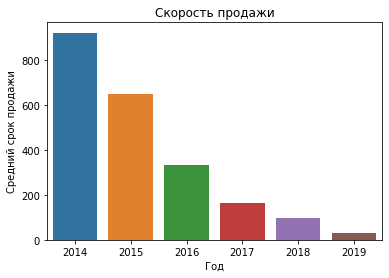

In [126]:
data_pivot_sell_days = data_good_day[data_good_day['days_exposition'] != -1].pivot_table(
    index = ['year_of_publ'], 
    values = 'days_exposition', 
    aggfunc = {'count', 'sum', 'mean', 'median'})
display(data_pivot_sell_days)
sns.barplot(x = data_pivot_sell_days.index, 
            y = data_pivot_sell_days['mean']).set(
    xlabel='Год', \
    ylabel='Cредний срок продажи', 
    title='Скорость продажи');

Здесь мы берем среднюю без учета заглушек, так как данные уже отфильтрованы. Данных за 2014г. крайне мало, поэтому их не учитываем. Корректно можно сравнивать данные только за период с 2016 по 2018гг. В целом заметна тенденция ускорение продаж квартир за исследуемый период. Срок продажи сократился в 3,4 раза - с 334 дней в 2016г. до 99 дней в 2018г. 

#### Проанализируем ценообразование квартир. Рассмотрим влияние различных факторов и построим коэффициент корреляции

Цену продажи будем брать не за квадратный метр, а общую стоимость, так как цена за квадратный метр в первую очередь зависит от расположения(населенного пункта) и типа дома(сколько этажей в доме, аппартаменты или студия, открытая ли планировка), что будет некорректно

In [128]:
display(data.corr()['last_price'].sort_values(ascending = False))

last_price            1.000000
price_per_m           0.770426
total_area            0.725375
living_area           0.612039
kitchen_area          0.541952
rooms                 0.417352
ceiling_height        0.387155
ponds_around3000      0.289484
parks_around3000      0.271644
nearest_park_km       0.251492
nearest_ponds_km      0.213035
nearest_airport_km    0.210116
total_images          0.132736
floor                 0.065493
floors_total          0.062046
days_exposition       0.058986
is_apartment          0.032451
balcony               0.028908
month_of_publ         0.008150
day_of_publ          -0.005696
city_center_km       -0.017489
open_plan            -0.020927
city_center          -0.030527
year_of_publ         -0.042830
studio               -0.044181
Name: last_price, dtype: float64

По коэффициенту корреляции мы уже сразу видим высокую зависимость между общей площадью квартиры и ценой. Проведем более точный анализ

0.7253750449604548

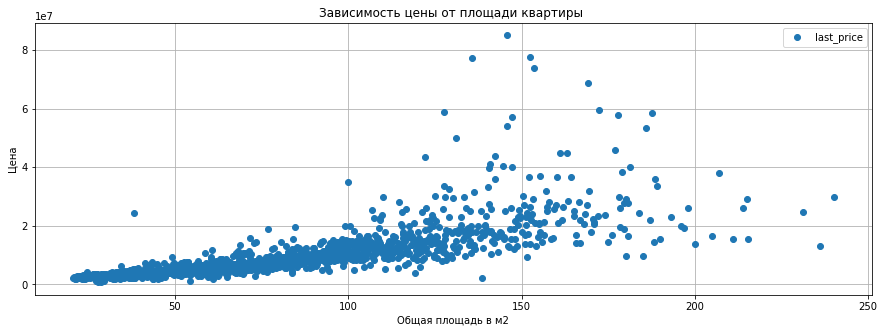

In [129]:
data.pivot_table(index='total_area', values='last_price', aggfunc = 'median')\
.sort_values('last_price')\
.plot(grid=True, style='o', figsize=(15, 5))\
.set(title='Зависимость цены от площади квартиры ',
     ylabel='Цена', 
     xlabel = 'Общая площадь в м2');
display(data['total_area'].corr(data['last_price']))

Так как мы убрали выбивающиеся и нереальные значения. Получается достаточно сильная кореляция. Это особенно заметно по квартирам с площадью до 100м. 

0.6120394999118635

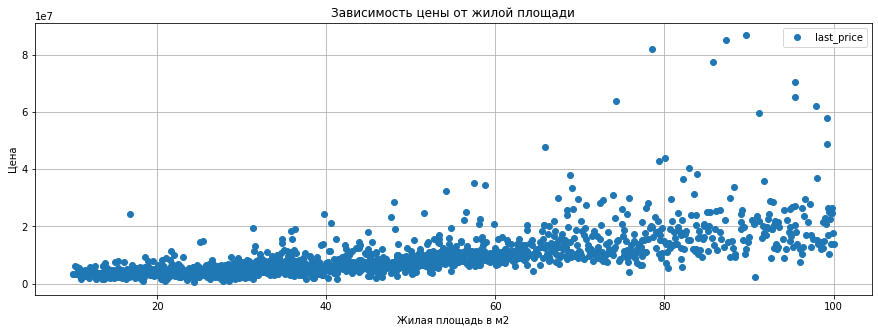

In [130]:
data.pivot_table(index='living_area', values='last_price', aggfunc = 'median')\
.sort_values('last_price')\
.plot(grid=True, style='o', figsize=(15, 5))\
.set(title='Зависимость цены от жилой площади',
     ylabel='Цена', 
     xlabel = 'Жилая площадь в м2');
display(data['last_price'].corr(data['living_area']))

С жилой площадь прослеживается Коэффициент корреляции Пирсона: 0,61. Что является заметным уровнем корреляции,стабильный взаимный рост цены квартиры и жилой площади прослеживается до значения площади в 60м. Однако есть и хаотичные распределения в этом диапазоне.

0.5419521409034126

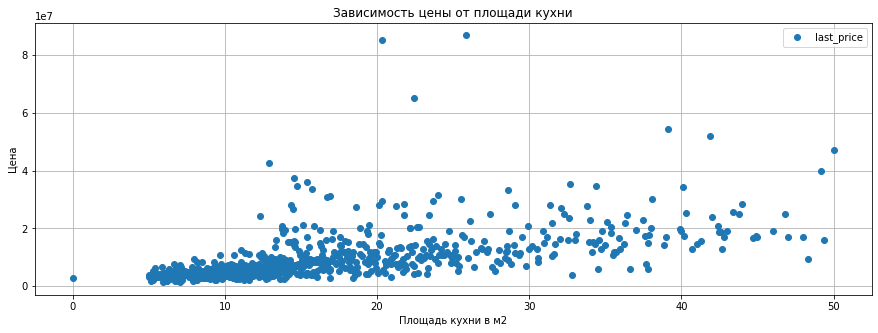

In [131]:
data.pivot_table(index='kitchen_area', values='last_price', aggfunc = 'median')\
.sort_values('last_price')\
.plot(grid=True, style='o', figsize=(15, 5))\
.set(title='Зависимость цены от площади кухни',
     ylabel='Цена', 
     xlabel = 'Площадь кухни в м2');
display(data['last_price'].corr(data['kitchen_area']))

С площадью кухни корреляция останавливается на умеренном уровне. Жилая площадь гораздо важнее и площадь кухни может быть 10 квадратов в квартире с общей площадью в 100м2. Это уже зависит от застройщика, поэтому кореляция здесь ниже чем в предыдущих параметрах.

0.4173522916516082

,last_price
rooms,
0,2800000
1,3649500
2,4780000
3,6177643
4,8675000
5,10800000
6,12000000
7,15175000


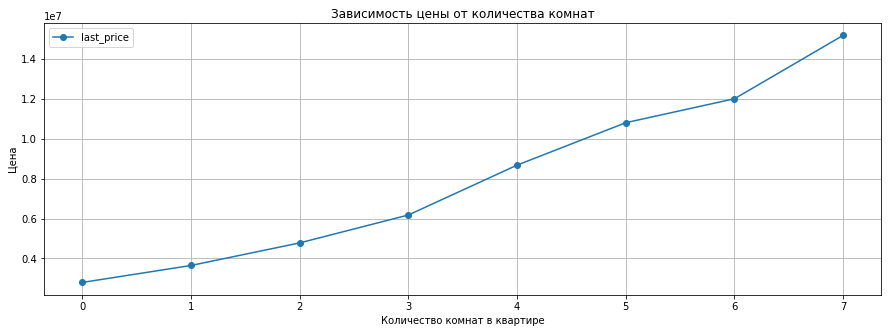

In [132]:
data_pivot_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc = 'median').sort_values('last_price')
data_pivot_rooms.plot(grid=True, style='o-', figsize=(15, 5))\
.set(title='Зависимость цены от количества комнат',
     ylabel='Цена', 
     xlabel = 'Количество комнат в квартире');
display(data['last_price'].corr(data['rooms']))
data_pivot_rooms

На графике мы видим стабильный рост зависимости цены и комнатности квартиры. Корреляция прослеживается умеренная

,last_price
floor_group,
другой,4800000
первый,3950000
последний,4300000


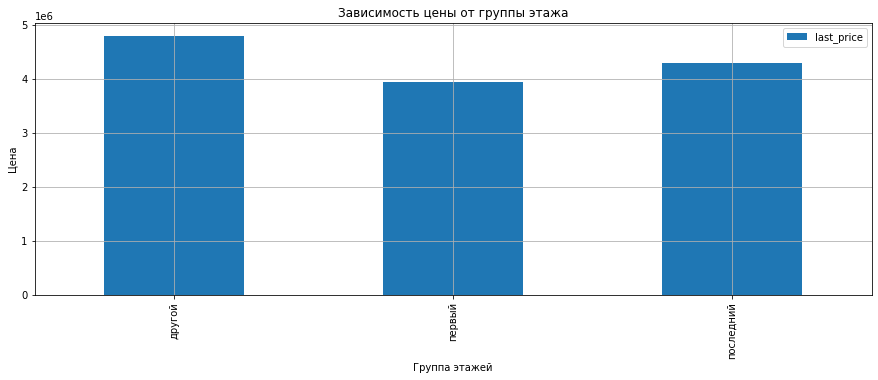

In [133]:
pivot_table_floor_group = data.pivot_table(index='floor_group', values='last_price', aggfunc = 'median')
pivot_table_floor_group.plot(kind='bar',grid=True, figsize=(15, 5)).set(
    xlabel='Группа этажей', 
    ylabel='Цена', 
    title='Зависимость цены от группы этажа');
pivot_table_floor_group

Квартиры на первом этаже ожидаемо стоят меньше на 850 тысяч, тогда как квартиры на последнем этаже могут быть аппартаментами или с открытой планировкой, что повышает их площадь, комнатность и цену в целом, поэтому они не так сильно проседают по цене и от группы "средних этажей" отстают на 10,4%

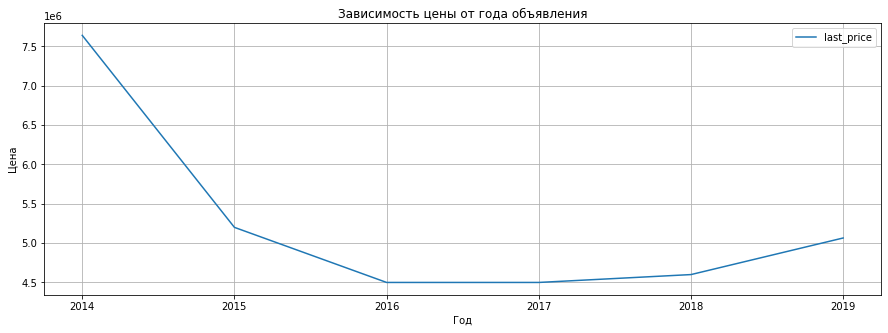

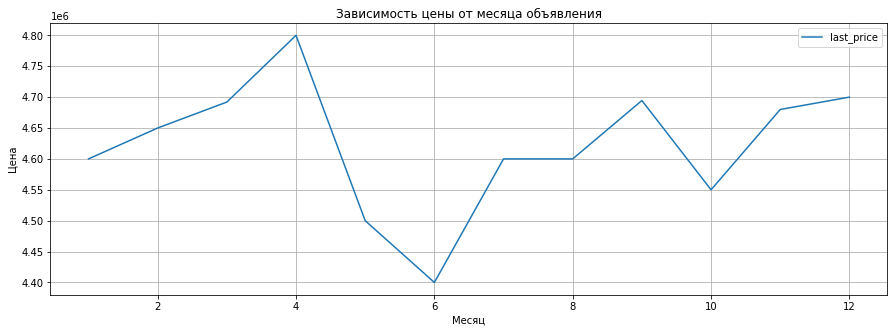

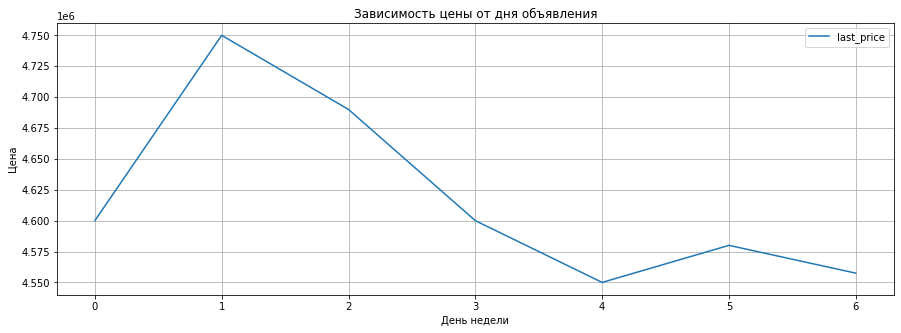

In [134]:
data.pivot_table(index = 'year_of_publ', values='last_price', aggfunc = 'median')\
.plot(grid=True, figsize=(15, 5))\
.set(title='Зависимость цены от года объявления',
     ylabel='Цена', 
     xlabel = 'Год');
plt.show();
data.pivot_table(index = 'month_of_publ', values='last_price', aggfunc = 'median')\
.plot(grid=True, figsize=(15, 5))\
.set(title='Зависимость цены от месяца объявления',
     ylabel='Цена',  
     xlabel = 'Месяц');
plt.show();
data.pivot_table(index = 'day_of_publ', values='last_price', aggfunc = 'median')\
.plot(grid=True, figsize=(15, 5))\
.set(title='Зависимость цены от дня объявления',
     ylabel='Цена', 
     xlabel = 'День недели');
plt.show();

Самые дорогие объявления попадают на площадку во вторник и среду. Середина по цене - идет понедельник и четверг, в оставшиеся дни размещаемые объявление с ценой ниже. По месяцам - саый дорогой у нас вышел апрель, самый "бюджетный" - май.<br>
Ниже узнаем почему резко пошел спад цены и проверим зависимость года и других значений.
Здесь мы берем среднюю без учета заглушек, так как данные уже отфильтрованы.Если дни недели являются довольно рандомной единицей в определении стоимости, то вот год - довольно стабильная единица, необходимо понять почему пошел резкий спад с 2014 по 2016.

In [135]:
data_pivot_ymd_analys = data_good_day.pivot_table(index = ['year_of_publ'], values = 'last_price', aggfunc = {'count', 'sum', 'mean', 'median'})
display(data_pivot_ymd_analys)

,count,mean,median,sum
year_of_publ,,,,
2014,128.0,1.100339e+07,7640000.0,1.408434e+09
2015,1081.0,6.949581e+06,5200000.0,7.512497e+09
2016,2464.0,6.020806e+06,4550000.0,1.483526e+10
2017,7117.0,5.730099e+06,4500000.0,4.078112e+10
2018,7105.0,5.654103e+06,4600000.0,4.017240e+10
2019,2595.0,6.268104e+06,5100000.0,1.626573e+10


 Данных за 2014г. крайне мало, поэтому их не учитываем. Корректно можно сравнивать данные только за период с 2016 по 2019гг. В целом заметна тенденция ускорение продаж квартир за исследуемый период. Срок продажи сократился в 3,4 раза - с 334 дней в 2016г. до 99 дней в 2018г. Напомню коэффициент корреляции цены и общей площади составил - 0.73. Так как общая площадь имеет наибольшое влияние на цену квартиры, посмотрим с какой средней площадью были представлены объявления в наших временных рамках.

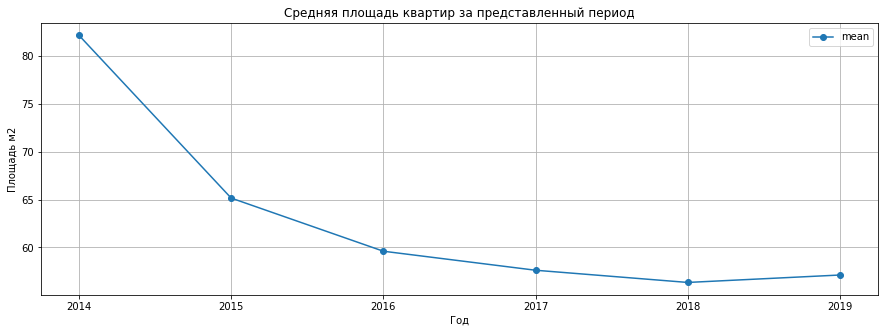

,mean
year_of_publ,
2014,82.160078
2015,65.160278
2016,59.608563
2017,57.621659
2018,56.346497
2019,57.122636


In [136]:
data_pivot_total_area_analys = data_good_day.pivot_table(index = ['year_of_publ'], values = 'total_area', aggfunc = {'mean'})
data_pivot_total_area_analys.plot(grid=True, style='o-', figsize=(15, 5))\
.set(title='Средняя площадь квартир за представленный период',
     ylabel='Площадь м2', 
     xlabel = 'Год');
plt.show()
data_pivot_total_area_analys

Также как и в случае с ценой мы видим практически идентичный график, падение цены объяснимо снижением общей площади квартиры. В период с 17 по 19 год площадь уже "устоялась".

#### Найдем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [137]:
top_city = data['locality_name'].value_counts().head(10)
top_city

Санкт-Петербург    14583
Мурино               516
Кудрово              437
Шушары               426
Всеволожск           380
Пушкин               347
Колпино              328
Парголово            315
Гатчина              293
Выборг               216
Name: locality_name, dtype: int64

 Десятка населенных пунктов с наибольшим количеством объявлений нам известа. Теперь построим диаграмму и посмотрим значения.

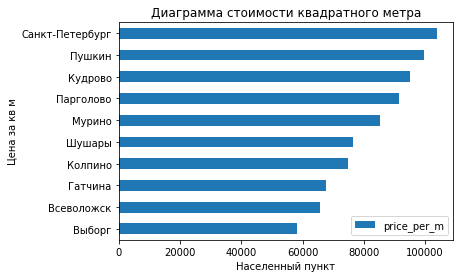

In [138]:
data.query('locality_name in @top_city.index') \
.pivot_table(index='locality_name', values='price_per_m', aggfunc='median') \
.sort_values('price_per_m').plot(kind='barh') \
.set(xlabel='Населенный пункт', ylabel='Цена за кв м', \
     title='Диаграмма стоимости квадратного метра');

In [139]:
data_top_city = data.query('locality_name in @top_city.index') \
.pivot_table(index='locality_name', values='price_per_m', aggfunc = {'count', 'mean'})
data_top_city = data_top_city[['count', 'mean']].sort_values('mean').round(2).reset_index()
data_top_city

,locality_name,count,mean
0,Выборг,216,58000.03
1,Всеволожск,380,68615.60
2,Гатчина,293,68743.30
3,Колпино,328,75328.02
4,Шушары,426,78187.41
5,Мурино,516,85536.89
6,Парголово,315,90117.64
7,Кудрово,437,94778.61
8,Пушкин,347,102664.82
9,Санкт-Петербург,14583,111943.38


По представленной диаграмме можем в порядке возрастания увидеть, что Санкт-Петербург является населенным пунктом с самой дорогой недвижимостью (в пересчете на 1 квадратный метр), а Выборг - с самой дешевой. Удивительно,что г.Пушкин по стоимости квадратного метра отстает от Питера всего на 9 278,56р. Например, середина нашей диаграмма - поселок Шушары. Он находится практически на административных границах Санкт-Петербурга, а стоимость квадратного метра в квартире там заметно ниже, чем в более удаленном г.Пушкин. 78 187,41р против 102 664,82р.

#### Проанализируем зависимость стоимости квартиры от близости к центру Санкт-Петербурга 

In [140]:
data_spb = data_good_day[data_good_day['locality_name'] == 'Санкт-Петербург']
data_spb = data_spb[data_spb['city_center_km'] != -1]
data_spb.reset_index()


,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,nearest_park_km,ponds_around3000,nearest_ponds_km,days_exposition,price_per_m,city_center_km,day_of_publ,month_of_publ,year_of_publ,floor_group
0,0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,...,0.482,2,0.755,-1,120370.370370,16.0,3,3,2019,другой
1,2,10,5196000,56.00,2015-08-20,2,2.70,5,34.300000,4,...,0.090,2,0.574,558,92785.714286,14.0,3,8,2015,другой
2,4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,...,0.112,1,0.048,121,100000.000000,8.0,1,6,2018,другой
3,7,5,7915000,71.60,2019-04-18,2,2.70,24,45.226064,22,...,-1.000,0,-1.000,-1,110544.692737,12.0,3,4,2019,другой
4,9,18,5400000,61.00,2017-02-26,3,2.50,9,43.600000,7,...,-1.000,0,-1.000,289,88524.590164,15.0,6,2,2017,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13712,23688,19,9200000,101.00,2019-04-01,3,3.05,15,63.000000,12,...,-1.000,0,-1.000,23,91089.108911,14.0,0,4,2019,другой
13713,23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.300000,4,...,0.353,2,0.652,29,100566.572238,16.0,2,2,2018,другой
13714,23690,3,5500000,52.00,2018-07-19,2,2.70,5,31.000000,2,...,0.300,0,-1.000,15,105769.230769,6.0,3,7,2018,другой
13715,23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.300000,7,...,-1.000,1,0.806,519,129903.978052,4.0,3,10,2016,другой


In [141]:
data_spb.corr()['last_price'].sort_values(ascending = False)

last_price            1.000000
price_per_m           0.759648
total_area            0.751960
living_area           0.636966
kitchen_area          0.557608
rooms                 0.440194
ceiling_height        0.361636
ponds_around3000      0.226489
parks_around3000      0.198776
nearest_park_km       0.148347
total_images          0.117048
nearest_ponds_km      0.100828
days_exposition       0.072117
is_apartment          0.028835
balcony               0.024568
floor                 0.022707
month_of_publ        -0.000244
day_of_publ          -0.005405
nearest_airport_km   -0.007536
floors_total         -0.018414
open_plan            -0.021377
studio               -0.045161
year_of_publ         -0.046151
city_center          -0.372659
city_center_km       -0.373260
Name: last_price, dtype: float64

In [142]:
display(data_spb['last_price'].corr(data_spb['city_center_km']))

-0.37326004013178926

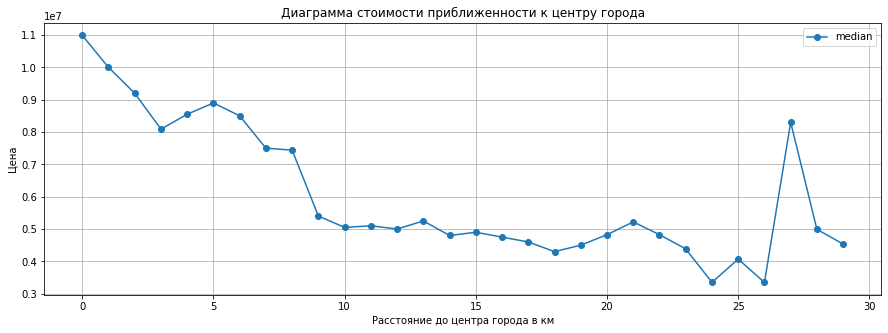

,median
city_center_km,
0.0,10990000
1.0,10000000
2.0,9200000
3.0,8090000
4.0,8550000
5.0,8900000
6.0,8500000
7.0,7500000
8.0,7440000


In [143]:
data_spb_pivot = data_spb.pivot_table(index='city_center_km',
                                                 values='last_price', 
                                                 aggfunc = {'median'})
data_spb_pivot.plot(style='-o',
                               figsize=(15, 5), 
                               grid=True)\
.set(xlabel='Расстояние до центра города в км',
     ylabel='Цена',
     title='Диаграмма стоимости приближенности к центру города');
plt.show()
display(data_spb_pivot)

In [144]:
display(data_spb[data_spb['city_center_km'] == 3].describe())
display(data_spb[data_spb['city_center_km'] == 4].describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,nearest_park_km,ponds_around3000,nearest_ponds_km,days_exposition,price_per_m,city_center_km,day_of_publ,month_of_publ,year_of_publ
count,277.000000,2.770000e+02,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,...,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.0,277.000000,277.000000,277.000000
mean,10.689531,9.674637e+06,80.227220,2.732852,2.992563,5.086643,48.012576,3.162455,12.763863,0.126354,...,1.176895,0.021224,1.411552,0.170805,192.129964,120769.882552,3.0,2.574007,6.332130,2017.234657
std,5.962838,6.648733e+06,29.843628,1.080511,0.329166,1.173254,20.319249,1.580783,6.279552,0.428080,...,0.956163,0.670092,1.118169,0.669413,259.162932,54975.744742,0.0,1.731771,3.459624,1.176071
min,0.000000,2.800000e+06,22.700000,0.000000,2.500000,2.000000,12.100000,1.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000,-1.000000,-1.000000,62179.487179,3.0,0.000000,1.000000,2014.000000
25%,6.000000,6.000000e+06,56.700000,2.000000,2.700000,4.000000,33.000000,2.000000,8.800000,0.000000,...,0.000000,-1.000000,1.000000,0.056000,11.000000,92863.503371,3.0,1.000000,3.000000,2017.000000
50%,11.000000,8.090000e+06,77.000000,3.000000,2.950000,5.000000,45.300000,3.000000,10.400000,0.000000,...,1.000000,0.307000,1.000000,0.365000,94.000000,107567.567568,3.0,3.000000,6.000000,2017.000000
75%,15.000000,1.100000e+07,97.000000,3.000000,3.200000,6.000000,60.400000,4.000000,15.000000,0.000000,...,2.000000,0.508000,3.000000,0.680000,271.000000,133800.000000,3.0,4.000000,10.000000,2018.000000
max,32.000000,8.200000e+07,176.000000,7.000000,4.000000,9.000000,100.000000,9.000000,40.200000,4.000000,...,3.000000,1.041000,3.000000,1.077000,1225.000000,719298.245614,3.0,6.000000,12.000000,2019.000000


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,nearest_park_km,ponds_around3000,nearest_ponds_km,days_exposition,price_per_m,city_center_km,day_of_publ,month_of_publ,year_of_publ
count,556.000000,5.560000e+02,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,...,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.0,556.000000,556.000000,556.000000
mean,10.160072,1.022735e+07,82.028435,2.739209,2.959910,6.678058,48.172518,3.911871,12.589227,0.248201,...,0.708633,-0.174581,1.093525,-0.024518,222.088129,126253.528995,4.0,2.339928,6.517986,2017.185252
std,5.919087,5.718921e+06,31.579047,1.169573,0.300794,3.809749,21.752072,2.927558,5.822868,0.673499,...,0.753130,0.751020,1.083152,0.743204,279.249092,44635.705462,0.0,1.683387,3.410852,1.095379
min,0.000000,1.600000e+06,23.000000,0.000000,2.500000,2.000000,10.500000,1.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000,-1.000000,-1.000000,15861.571738,4.0,0.000000,1.000000,2014.000000
25%,6.000000,6.700000e+06,59.975000,2.000000,2.700000,5.000000,31.675000,2.000000,9.000000,0.000000,...,0.000000,-1.000000,0.000000,-1.000000,19.000000,95581.961454,4.0,1.000000,3.750000,2017.000000
50%,10.000000,8.550000e+06,76.000000,3.000000,2.900000,5.000000,44.550000,3.000000,11.000000,0.000000,...,1.000000,0.189000,1.000000,0.224000,103.000000,116209.863567,4.0,2.000000,7.000000,2017.000000
75%,15.000000,1.200000e+07,102.625000,3.000000,3.150000,7.000000,63.510971,5.000000,14.800000,0.000000,...,1.000000,0.508500,1.000000,0.621000,320.250000,146386.704353,4.0,4.000000,10.000000,2018.000000
max,32.000000,4.000000e+07,190.000000,7.000000,4.000000,25.000000,100.000000,25.000000,47.000000,5.000000,...,3.000000,1.011000,3.000000,1.187000,1363.000000,358974.358974,4.0,6.000000,12.000000,2019.000000


С самым главным фактором влияющим на цену, а именно площадью все в порядке, особого разброса нет. Необходимо обратить внимание на этажи.

In [145]:
display(data_spb[data_spb['city_center_km'] == 2]['floors_total'].value_counts())
display(data_spb[data_spb['city_center_km'] == 3]['floors_total'].value_counts())
display(data_spb[data_spb['city_center_km'] == 4]['floors_total'].value_counts())

5    80
4    54
6    50
3    25
7     9
2     4
9     4
8     3
Name: floors_total, dtype: int64

5    110
4     59
6     59
7     21
3     20
9      4
8      3
2      1
Name: floors_total, dtype: int64

5     173
6     109
4      91
7      48
10     34
8      19
3      19
19     13
11      9
9       9
12      8
25      6
15      4
16      3
14      3
18      2
20      2
21      2
2       2
Name: floors_total, dtype: int64

После третьего километра добавляются современные высотки. Центром города можно считать расстояние до 3 км, так как там расположены максимум 9-ти этажки и видна прямая зависимость цены и расположения. Проверим еще тип этажа продаваемой квартиры

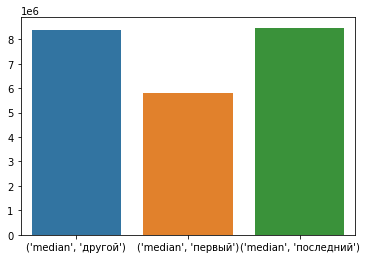

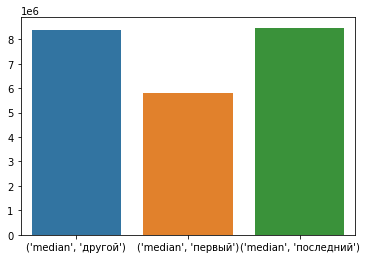

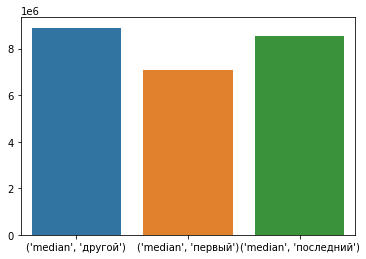

In [146]:
data_pivot_floors_group = data_spb.pivot_table(index=['city_center_km'], 
                                      columns = ['floor_group'],
                                      values='last_price', 
                                      aggfunc = {'median'})
sns.barplot(data = data_pivot_floors_group.query('city_center_km == 3'));
plt.show()
sns.barplot(data = data_pivot_floors_group.query('city_center_km == 3'));
plt.show()
sns.barplot(data = data_pivot_floors_group.query('city_center_km == 4'));
plt.show()

In [147]:
display(data_spb[(data_spb['floor_group'] == 'другой') & (data_spb['city_center_km'] == 2)]['floor_group'].count() / (data_spb[data_spb['city_center_km'] == 2]['floor_group'].count()))
display(data_spb[(data_spb['floor_group'] == 'первый') & (data_spb['city_center_km'] == 2)]['floor_group'].count() / (data_spb[data_spb['city_center_km'] == 2]['floor_group'].count()))
display(data_spb[(data_spb['floor_group'] == 'последний') & (data_spb['city_center_km'] == 2)]['floor_group'].count() / (data_spb[data_spb['city_center_km'] == 2]['floor_group'].count()))

0.5895196506550219

0.1615720524017467

0.24890829694323144

In [148]:
display(data_spb[(data_spb['floor_group'] == 'другой') & (data_spb['city_center_km'] == 3)]['floor_group'].count() / (data_spb[data_spb['city_center_km'] == 3]['floor_group'].count()))
display(data_spb[(data_spb['floor_group'] == 'первый') & (data_spb['city_center_km'] == 3)]['floor_group'].count() / (data_spb[data_spb['city_center_km'] == 3]['floor_group'].count()))
display(data_spb[(data_spb['floor_group'] == 'последний') & (data_spb['city_center_km'] == 3)]['floor_group'].count() / (data_spb[data_spb['city_center_km'] == 3]['floor_group'].count()))

0.5740072202166066

0.17328519855595667

0.2527075812274368

In [149]:
display(data_spb[(data_spb['floor_group'] == 'другой') & (data_spb['city_center_km'] == 4)]['floor_group'].count() / (data_spb[data_spb['city_center_km'] == 4]['floor_group'].count()))
display(data_spb[(data_spb['floor_group'] == 'первый') & (data_spb['city_center_km'] == 4)]['floor_group'].count() / (data_spb[data_spb['city_center_km'] == 4]['floor_group'].count()))
display(data_spb[(data_spb['floor_group'] == 'последний') & (data_spb['city_center_km'] == 4)]['floor_group'].count() / (data_spb[data_spb['city_center_km'] == 4]['floor_group'].count()))

0.7284172661870504

0.10971223021582734

0.1618705035971223

Как мы выяснили раньше, квартиры с категорией этиажа "другой" оцениваются больше по стоимости и % таких квартир на 4 километре составляет 72,8% и меньше всего низколиквидных квартир на первом этаже, что подстегивает стоимость не смотря на удаленность от центра.В Петербурге прослеживается явная зависимость цены от принадлежности к центру города. Основное падение в стоимости происходит в случае,когда квартира находится радиусе 3 километров это заметно по нашему графику и снижению цены по третий километр. Далее на стоимость уже больше влияют другие факторы.

Теперь проделаем все то же самое с 5 и 6 километром, чтобы определить в чем особенности цены квартир на 5-ом километре.


In [150]:
display(data_spb[(data_spb['floor_group'] == 'другой') & (data_spb['city_center_km'] == 5)]['floor_group'].count() / (data_spb[data_spb['city_center_km'] == 5]['floor_group'].count()))
display(data_spb[(data_spb['floor_group'] == 'первый') & (data_spb['city_center_km'] == 5)]['floor_group'].count() / (data_spb[data_spb['city_center_km'] == 5]['floor_group'].count()))
display(data_spb[(data_spb['floor_group'] == 'последний') & (data_spb['city_center_km'] == 5)]['floor_group'].count() / (data_spb[data_spb['city_center_km'] == 5]['floor_group'].count()))

0.7610738255033557

0.087248322147651

0.15167785234899328

In [151]:
display(data_spb[data_spb['city_center_km'] == 5]['floors_total'].value_counts())

5     193
6     122
10     65
4      65
7      59
9      57
19     37
8      33
11     33
12     21
13     15
3      14
15      8
14      8
23      6
20      3
25      3
16      2
18      1
Name: floors_total, dtype: int64

Здесь также добавляются высотки, процент самых ликвидных и стоимостных квартир еще выше, а процент самых дешевых квартир(на первом этаже) по сравнению с также уменьшился по сравнению с 4-ым км

In [152]:
display(data_spb[(data_spb['floor_group'] == 'другой') & (data_spb['city_center_km'] == 6)]['floor_group'].count() / (data_spb[data_spb['city_center_km'] == 6]['floor_group'].count()))
display(data_spb[(data_spb['floor_group'] == 'первый') & (data_spb['city_center_km'] == 6)]['floor_group'].count() / (data_spb[data_spb['city_center_km'] == 6]['floor_group'].count()))

0.7454545454545455

0.12121212121212122

Теперь все стало на свои места. Доля дорогих квартир уменьшается, доля дешевых квартир на первом этаже увеличивается, отсюда и кажется зависимость в расстоянии до центра.

Теперь проверим 27-ой километр

In [153]:
display(data_spb[data_spb['city_center_km'] == 27].describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,nearest_park_km,ponds_around3000,nearest_ponds_km,days_exposition,price_per_m,city_center_km,day_of_publ,month_of_publ,year_of_publ
count,2.000000,2.000000e+00,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.0,...,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.0,2.0,2.000000,2.000000
mean,9.500000,8.300000e+06,53.000000,1.500000,2.915000,3.50000,23.250000,2.500000,16.000000,0.0,...,0.500000,0.248000,0.0,-1.0,153.000000,132115.709459,27.0,1.0,6.500000,2017.500000
std,4.949747,8.555992e+06,29.698485,0.707107,0.304056,2.12132,9.545942,0.707107,12.727922,0.0,...,0.707107,1.764939,0.0,0.0,35.355339,87402.937016,0.0,0.0,6.363961,0.707107
min,6.000000,2.250000e+06,32.000000,1.000000,2.700000,2.00000,16.500000,2.000000,7.000000,0.0,...,0.000000,-1.000000,0.0,-1.0,128.000000,70312.500000,27.0,1.0,2.000000,2017.000000
25%,7.750000,5.275000e+06,42.500000,1.250000,2.807500,2.75000,19.875000,2.250000,11.500000,0.0,...,0.250000,-0.376000,0.0,-1.0,140.500000,101214.104730,27.0,1.0,4.250000,2017.250000
50%,9.500000,8.300000e+06,53.000000,1.500000,2.915000,3.50000,23.250000,2.500000,16.000000,0.0,...,0.500000,0.248000,0.0,-1.0,153.000000,132115.709459,27.0,1.0,6.500000,2017.500000
75%,11.250000,1.132500e+07,63.500000,1.750000,3.022500,4.25000,26.625000,2.750000,20.500000,0.0,...,0.750000,0.872000,0.0,-1.0,165.500000,163017.314189,27.0,1.0,8.750000,2017.750000
max,13.000000,1.435000e+07,74.000000,2.000000,3.130000,5.00000,30.000000,3.000000,25.000000,0.0,...,1.000000,1.496000,0.0,-1.0,178.000000,193918.918919,27.0,1.0,11.000000,2018.000000


Получается всего 2 квартиры (одна и двухкомнатная) на 27-ом километре,хоть все данные помимо расстояния впорядке, мы можем считать их выбросами, ведь одна одна из квартир стоит 14,35 млн, а другая 2.25. Если бы мы отсортировали данные еще по количеству комнат в квартире, аномалия бы не проявилась <br>


##### Подведем итог по Санкт-Петербургу <br>
Центром города можно считать расстояние до 3 км, где видна прямая зависимость цены и расстояния. Так как там расположены максимум 9-ти этажки после третьего километра видно современные застройки, добавляются высотки. Особую ценность в Питере имеют квартиры не на первом и не на последнем этаже. После 3-го километра основные факторы стоимости возвращаются в норму - это площадь квартиры (отсюда вытекают жилая площадь, площадь кухни и комнатность) и тип этажа.

### Общий вывод

Проведя исследовательскую работу по объявлениям о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет можно сделать следующие выводы:<br>
В ходе проделанной работы были заполнены пропуски данных, обработаны выбивающиеся и аномальные значения, переформатированы форматы данных.<br>

**Результаты:**<br>
-  Самые быстрые продажи происходят в течение суток. Согласно нашим данным самая долгая продажа составляла 1580 дней , это более 4 лет. Быстрыми продажи можно считать в срок до 41 дня. Долгие продажи это 249 дней и более.
- Самые продаваемые квартиры считаются с потолком от 2,5 до 3 метров в высоту, исключая первый и последние этажи.
- Так как Петербург и Ленинградская область представляют собой историческую ценность, дома в основной своей массе до 10 этажей в высоту. Высотки не так распространены, однако они есть, например в области,в городе Кудрово.
- Самые продаваемые квартиры 1,2 и 3-ех комнатные. Они занимают большую часть рынка.
- Больше всех объявлений в связи с культурным и историческим фондом представляет категория 5-ти этажных домов.
- С февраля по апрель самые активные продажи далее идет ноябрь. Проседают по продажам больше всего праздничные месяцы - январь, май и декабрь. В это время у людей достаточно много забот и они откладывают такую крупную покупку, как квартира. В то же время сразу же после январских праздников люди активизируются. Люди подбили бюджет, выбрали что им необходимо или вернулись к отложенному и решились на покупку в "новом году" с чистой головой. Ноябрь в свою очередь как раз "последний шанс" закрыть сделку в текущем году и ничего не откладывать на потом.<br>
- По дням - продажи происходят в будни и складывается очевидный факт, что как минимум половину квартир продают через риэлторов, которые как и все по выходным отдыхают.<br>
- Санкт-Петербург является населенным пунктом с самой дорогой недвижимостью. Чем ближе квартиры к центру города, тем они дороже.
- По сегодняшний день, в маленьких городах и деревнях с исторической архитектурой квартиры продаются по завышенной цене. Яркий пример - это г. Пушкин. Разница в стоимости за 1 кв.м. от Санкт-Петербурга составляет 8,3%.
- В г. Выборг имеется большое количество объявлений по доступной цене. Один квадратный метр там дешевле на 48% чем в Петербурге.
- По Лен. области главная переменная влияющая на стоимость квартиры - это жилая площадь.
- В случае Петербурга добавляется расстояние до центра города. Особую ценность в Питере имеют квартиры не на первом и не на последнем этаже. Важно, что после 3-го километра основные факторы стоимости возвращаются в норму - это площадь квартиры (отсюда вытекают жилая площадь, площадь кухни и комнатность) и тип этажа.